<a href="https://colab.research.google.com/github/gaurisharma360/Some-fun-projects/blob/master/Amazon_Recommendation_System%20(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import math
import time
import re
import os
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances
from matplotlib import gridspec
from scipy.sparse import hstack
import plotly
import plotly.figure_factory as ff
from plotly.graph_objs import Scatter, Layout

plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

In [5]:
#reading the json file
import io
import pandas as pd
from google.colab import files
uploaded = files.upload()
data = pd.read_json(io.StringIO(uploaded.get('tops_fashion.json').decode('utf-8')))

Saving tops_fashion.json to tops_fashion (1).json


In [7]:
data = pd.read_json(io.StringIO(uploaded.get('tops_fashion.json').decode('utf-8')))

In [8]:
#number of data points basically refers to the no of products here
#no of features of those products
print("Number of data points:",data.shape[0],\
     "Number of features or variable:",data.shape[1])

Number of data points: 183138 Number of features or variable: 19


In [9]:
#we see what are the feature available
data.columns

Index(['sku', 'asin', 'product_type_name', 'formatted_price', 'author',
       'color', 'brand', 'publisher', 'availability', 'reviews',
       'large_image_url', 'availability_type', 'small_image_url',
       'editorial_review', 'title', 'model', 'medium_image_url',
       'manufacturer', 'editorial_reivew'],
      dtype='object')

In [10]:
#out of thee 19 features we tend to use the main 6 feature
data=data[["asin","brand","color","medium_image_url","product_type_name","title","formatted_price"]]

In [11]:
print("Number of data points:",data.shape[0],\
     "Number of features or variable:",data.shape[1])

Number of data points: 183138 Number of features or variable: 7


In [12]:
data.head()

asin         brand              color  \
0  B016I2TS4W         FNC7C               None   
1  B01N49AI08  FIG Clothing               None   
2  B01JDPCOHO  FIG Clothing               None   
3  B01N19U5H5       Focal18               None   
4  B004GSI2OS   FeatherLite  Onyx Black/ Stone   

                                    medium_image_url product_type_name  \
0  https://images-na.ssl-images-amazon.com/images...             SHIRT   
1  https://images-na.ssl-images-amazon.com/images...             SHIRT   
2  https://images-na.ssl-images-amazon.com/images...             SHIRT   
3  https://images-na.ssl-images-amazon.com/images...             SHIRT   
4  https://images-na.ssl-images-amazon.com/images...             SHIRT   

                                               title formatted_price  
0  Minions Como Superheroes Ironman Long Sleeve R...            None  
1                      FIG Clothing Womens Izo Tunic            None  
2                        FIG Clothing Womens Won Top            None  
3  Focal18 Sailor Collar Bubble Sleeve Blouse Shi...            None  
4  Featherlite Ladies' Long Sleeve Stain Resistan...          $26.26

# Analysing and Cleaning of data

In [13]:
print(data["product_type_name"].describe())
#describe gives us general insights

count     183138
unique        72
top        SHIRT
freq      167794
Name: product_type_name, dtype: object


In [14]:
print(data["product_type_name"].unique())
#unique gives indepth insight

['SHIRT' 'SWEATER' 'APPAREL' 'OUTDOOR_RECREATION_PRODUCT'
 'BOOKS_1973_AND_LATER' 'PANTS' 'HAT' 'SPORTING_GOODS' 'DRESS' 'UNDERWEAR'
 'SKIRT' 'OUTERWEAR' 'BRA' 'ACCESSORY' 'ART_SUPPLIES' 'SLEEPWEAR'
 'ORCA_SHIRT' 'HANDBAG' 'PET_SUPPLIES' 'SHOES' 'KITCHEN' 'ADULT_COSTUME'
 'HOME_BED_AND_BATH' 'MISC_OTHER' 'BLAZER' 'HEALTH_PERSONAL_CARE'
 'TOYS_AND_GAMES' 'SWIMWEAR' 'CONSUMER_ELECTRONICS' 'SHORTS' 'HOME'
 'AUTO_PART' 'OFFICE_PRODUCTS' 'ETHNIC_WEAR' 'BEAUTY'
 'INSTRUMENT_PARTS_AND_ACCESSORIES' 'POWERSPORTS_PROTECTIVE_GEAR' 'SHIRTS'
 'ABIS_APPAREL' 'AUTO_ACCESSORY' 'NONAPPARELMISC' 'TOOLS' 'BABY_PRODUCT'
 'SOCKSHOSIERY' 'POWERSPORTS_RIDING_SHIRT' 'EYEWEAR' 'SUIT'
 'OUTDOOR_LIVING' 'POWERSPORTS_RIDING_JACKET' 'HARDWARE' 'SAFETY_SUPPLY'
 'ABIS_DVD' 'VIDEO_DVD' 'GOLF_CLUB' 'MUSIC_POPULAR_VINYL'
 'HOME_FURNITURE_AND_DECOR' 'TABLET_COMPUTER' 'GUILD_ACCESSORIES'
 'ABIS_SPORTS' 'ART_AND_CRAFT_SUPPLY' 'BAG' 'MECHANICAL_COMPONENTS'
 'SOUND_AND_RECORDING_EQUIPMENT' 'COMPUTER_COMPONENT' 'JEWELRY'
 'B

In [15]:
# finding 10 most frequently used product type names
#counter count frequency for all the product
#.most_common(10)display 10 top most
product_type_count=Counter(list(data["product_type_name"]))
product_type_count.most_common(10)

[('SHIRT', 167794),
 ('APPAREL', 3549),
 ('BOOKS_1973_AND_LATER', 3336),
 ('DRESS', 1584),
 ('SPORTING_GOODS', 1281),
 ('SWEATER', 837),
 ('OUTERWEAR', 796),
 ('OUTDOOR_RECREATION_PRODUCT', 729),
 ('ACCESSORY', 636),
 ('UNDERWEAR', 425)]

In [16]:
print(data["brand"].describe())

count     182987
unique     10577
top         Zago
freq         223
Name: brand, dtype: object


In [17]:
# finding 10 most frequently used brand names
#counter count frequency for all the brands
#.most_common(10)display 10 top most
brand_count=Counter(list(data["brand"]))
brand_count.most_common(10)

[('Zago', 223),
 ('XQS', 222),
 ('Yayun', 215),
 ('YUNY', 198),
 ('XiaoTianXin-women clothes', 193),
 ('Generic', 192),
 ('Boohoo', 190),
 ('Alion', 188),
 ('Abetteric', 187),
 ('TheMogan', 187)]

In [18]:
print(data["color"].describe())
#7380 unique colors


count     64956
unique     7380
top       Black
freq      13207
Name: color, dtype: object


In [19]:
# finding 10 most frequently used color names
#counter count frequency for all the color
#.most_common(10)display 10 top most
color_count=Counter(list(data["color"]))
color_count.most_common(10)

[(None, 118182),
 ('Black', 13207),
 ('White', 8616),
 ('Blue', 3570),
 ('Red', 2289),
 ('Pink', 1842),
 ('Grey', 1499),
 ('*', 1388),
 ('Green', 1258),
 ('Multi', 1203)]

In [20]:
print(data["formatted_price"].describe())

count      28395
unique      3135
top       $19.99
freq         945
Name: formatted_price, dtype: object


In [21]:
# finding 10 most frequently used prices
#counter count frequency for all the prices
#.most_common(10)display 10 top most
color_count=Counter(list(data["formatted_price"]))
color_count.most_common(10)

[(None, 154743),
 ('$19.99', 945),
 ('$9.99', 749),
 ('$9.50', 601),
 ('$14.99', 472),
 ('$7.50', 463),
 ('$24.99', 414),
 ('$29.99', 370),
 ('$8.99', 343),
 ('$9.01', 336)]

In [22]:
print(data["title"].describe())

count                                                183138
unique                                               175985
top       Nakoda Cotton Self Print Straight Kurti For Women
freq                                                     77
Name: title, dtype: object


In [23]:
data.isnull().sum() 

asin                      0
brand                   151
color                118182
medium_image_url          0
product_type_name         0
title                     0
formatted_price      154743
dtype: int64

In [24]:
data.to_pickle(r"/content/180k_apparel_data")

In [25]:
# consider products which have price information, data['formatted_price'].isnull() => gives the information 
# about the dataframe row's which have null values price == None|Null
data = data.loc[~data['formatted_price'].isnull()]
#This will store those values whose 'formatted_price' is not null
print('Number of data points After eliminating price = NULL :', data.shape[0])

Number of data points After eliminating price = NULL : 28395


In [26]:
# consider products which have color information
# data['color'].isnull() => gives the information about the dataframe row's which have null values price == None|Null
data =data.loc[~data['color'].isnull()]
print('Number of data points After eliminating color = NULL :', data.shape[0]) 

Number of data points After eliminating color = NULL : 28385


In [27]:
data.to_pickle('/content/28k_apparel_data')

In [28]:
#removing near duplicate items (.duplicated is used for this)

print(sum(data.duplicated("title")))

2325


In [29]:
# read data from pickle file from previous stage
data = pd.read_pickle('/content/28k_apparel_data')
data.head() 

asin                        brand              color  \
4   B004GSI2OS                  FeatherLite  Onyx Black/ Stone   
6   B012YX2ZPI  HX-Kingdom Fashion T-shirts              White   
11  B001LOUGE4                 Fitness Etc.              Black   
15  B003BSRPB0                  FeatherLite              White   
21  B014ICEDNA                        FNC7C             Purple   

                                     medium_image_url product_type_name  \
4   https://images-na.ssl-images-amazon.com/images...             SHIRT   
6   https://images-na.ssl-images-amazon.com/images...             SHIRT   
11  https://images-na.ssl-images-amazon.com/images...             SHIRT   
15  https://images-na.ssl-images-amazon.com/images...             SHIRT   
21  https://images-na.ssl-images-amazon.com/images...             SHIRT   

                                                title formatted_price  
4   Featherlite Ladies' Long Sleeve Stain Resistan...          $26.26  
6   Women's Unique 100% Cotton T - Special Olympic...           $9.99  
11             Ladies Cotton Tank 2x1 Ribbed Tank Top          $11.99  
15  FeatherLite Ladies' Moisture Free Mesh Sport S...          $20.54  
21  Supernatural Chibis Sam Dean And Castiel Short...           $7.50

In [30]:
#removing products with a very small title as it is not a goog way of recommendation
data_sorted=data[data["title"].apply(lambda x:len(x.split())>4)]
print("After removal of products with short description:",data_sorted.shape[0])

After removal of products with short description: 27949


In [31]:
#sort whole dataset in ascending order
data_sorted.sort_values("title",inplace=True,ascending=False)
data_sorted.head()

asin     brand        color  \
61973   B06Y1KZ2WB    Éclair   Black/Pink   
133820  B010RV33VE  xiaoming         Pink   
81461   B01DDSDLNS  xiaoming        White   
75995   B00X5LYO9Y  xiaoming  Red Anchors   
151570  B00WPJG35K  xiaoming        White   

                                         medium_image_url product_type_name  \
61973   https://images-na.ssl-images-amazon.com/images...             SHIRT   
133820  https://images-na.ssl-images-amazon.com/images...             SHIRT   
81461   https://images-na.ssl-images-amazon.com/images...             SHIRT   
75995   https://images-na.ssl-images-amazon.com/images...             SHIRT   
151570  https://images-na.ssl-images-amazon.com/images...             SHIRT   

                                                    title formatted_price  
61973   Éclair Women's Printed Thin Strap Blouse Black...          $24.99  
133820  xiaoming Womens Sleeveless Loose Long T-shirts...          $18.19  
81461   xiaoming Women's White Long Sleeve Single Brea...          $21.58  
75995   xiaoming Stripes Tank Patch/Bear Sleeve Anchor...          $15.91  
151570  xiaoming Sleeve Sheer Loose Tassel Kimono Woma...          $14.32

In [ ]:
#after this type of sorting simialr titles appear
#eg-abcdef XL,abcdef L hence we want to remove them
#This helps us to get unique recommendations    

In [32]:
indices=[]
for i,row in data_sorted.iterrows():
    indices.append(i)

In [33]:
import itertools
stage1_dedupe_asins = []
i = 0
j = 0
num_data_points = data_sorted.shape[0]
while i < num_data_points and j < num_data_points:
    
    previous_i = i

    # store the list of words of ith string in a, ex: a = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'X-Large']
    a = data['title'].loc[indices[i]].split()

    # search for the similar products sequentially 
    j = i+1
    while j < num_data_points:

        # store the list of words of jth string in b, ex: b = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'Small']
        b = data['title'].loc[indices[j]].split()

        # store the maximum length of two strings
        length = max(len(a), len(b))

        # count is used to store the number of words that are matched in both strings
        count  = 0

        # itertools.zip_longest(a,b): will map the corresponding words in both strings, it will appened None in case of unequal strings
        # example: a =['a', 'b', 'c', 'd']
        # b = ['a', 'b', 'd']
        # itertools.zip_longest(a,b): will give [('a','a'), ('b','b'), ('c','d'), ('d', None)]
        for k in itertools.zip_longest(a,b): 
            if (k[0] == k[1]):
                count += 1

        # if the number of words in which both strings differ are > 2 , we are considering it as those two apperals are different
        # if the number of words in which both strings differ are < 2 , we are considering it as those two apperals are same, hence we are ignoring them
        if (length - count) > 2: # number of words in which both sensences differ
            # if both strings are differ by more than 2 words we include the 1st string index
            stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[i]])

            # if the comaprision between is between num_data_points, num_data_points-1 strings and they differ in more than 2 words we include both
            if j == num_data_points-1: stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[j]])

            # start searching for similar apperals corresponds 2nd string
            i = j
            break
        else:
            j += 1
    if previous_i == i:
        break

In [34]:
data = data.loc[data['asin'].isin(stage1_dedupe_asins)]

In [35]:
data.to_pickle('/content/17k_apparel_data')

In [37]:
print('Number of data points at final stage : ', data.shape[0])

Number of data points at final stage :  17593


In [ ]:
#data.to_pickle(r"D:\17k_apperal_data")

In [ ]:
#removing titles with very similar titles (not quite same as before )
# This code snippet takes significant amount of time.
# O(n^2) time.
# Takes about an hour to run on a decent computer.

indices = []
for i,row in data.iterrows():
    indices.append(i)

stage2_dedupe_asins = []
while len(indices)!=0:
    i = indices.pop()
    stage2_dedupe_asins.append(data['asin'].loc[i])
    # consider the first apperal's title
    a = data['title'].loc[i].split()
    # store the list of words of ith string in a, ex: a = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'X-Large']
    for j in indices:
        
        b = data['title'].loc[j].split()
        # store the list of words of jth string in b, ex: b = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'X-Large']
        
        length = max(len(a),len(b))
        
        # count is used to store the number of words that are matched in both strings
        count  = 0

        # itertools.zip_longest(a,b): will map the corresponding words in both strings, it will appened None in case of unequal strings
        # example: a =['a', 'b', 'c', 'd']
        # b = ['a', 'b', 'd']
        # itertools.zip_longest(a,b): will give [('a','a'), ('b','b'), ('c','d'), ('d', None)]
        for k in itertools.zip_longest(a,b): 
            if (k[0]==k[1]):
                count += 1

        # if the number of words in which both strings differ are < 3 , we are considering it as those two apperals are same, hence we are ignoring them
        if (length - count) < 3:
            indices.remove(j)

In [ ]:
# from whole previous products we will consider only 
# the products that are found in previous cell 
data = data.loc[data['asin'].isin(stage2_dedupe_asins)]

# text preprocessing

In [38]:
data = pd.read_pickle('/content/17k_apparel_data')

In [39]:
import nltk 
from nltk.corpus import stopwords
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
# we use the list of stop words that are downloaded from nltk lib.
stop_words = set(stopwords.words('english'))
print ('list of stop words:', stop_words)

def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        for words in total_text.split():
            # remove the special chars in review like '"#$@!%^&*()_+-~?>< etc.
            word = ("".join(e for e in words if e.isalnum()))
            # Conver all letters to lower-case
            word = word.lower()
            # stop-word removal
            if not word in stop_words:
                string += word + " "
        data[column][index] = string

list of stop words: {'but', 'have', 'below', "needn't", 'been', 'our', 'between', 'himself', 'll', 'which', 'i', 'yourselves', 'own', 'hadn', "aren't", 'should', 'my', 'at', 're', 'only', "should've", 'into', 'with', 'other', 'from', 'those', 'whom', "isn't", 'being', 'can', 'y', 'further', 'hasn', 'herself', 'didn', 'its', 'won', 'if', 'now', 'don', 'shouldn', 'it', 'the', 'yours', 'doing', 'her', 'an', 'than', 'once', 'do', 'theirs', 'when', 'or', 'itself', 'more', "shan't", 'she', 'down', "you'd", "hasn't", 'where', 'shan', 'until', 'their', "weren't", 'were', 'hers', 'no', 've', "wasn't", 'yourself', 'm', 'them', 'd', 'wouldn', 'so', 'couldn', 'just', 'weren', "you're", 'ours', "she's", "doesn't", "you'll", 'as', "haven't", 'ourselves', 'out', 'by', 'be', 'through', 'there', 'isn', 'haven', 'both', "couldn't", "didn't", "won't", 'does', 'about', "hadn't", 'under', 'how', 'any', "it's", 'over', 'not', "you've", 'is', 'are', 'mightn', 'most', 'all', 'did', 'you', "mightn't", 'after',

In [41]:
for index, row in data.iterrows():
    nlp_preprocessing(row['title'], index, 'title')

In [42]:
data.head()

asin                        brand              color  \
4   B004GSI2OS                  FeatherLite  Onyx Black/ Stone   
6   B012YX2ZPI  HX-Kingdom Fashion T-shirts              White   
15  B003BSRPB0                  FeatherLite              White   
27  B014ICEJ1Q                        FNC7C             Purple   
43  B0079BMKDS                  FeatherLite              White   

                                     medium_image_url product_type_name  \
4   https://images-na.ssl-images-amazon.com/images...             SHIRT   
6   https://images-na.ssl-images-amazon.com/images...             SHIRT   
15  https://images-na.ssl-images-amazon.com/images...             SHIRT   
27  https://images-na.ssl-images-amazon.com/images...             SHIRT   
43  https://images-na.ssl-images-amazon.com/images...           APPAREL   

                                                title formatted_price  
4   featherlite ladies long sleeve stain resistant...          $26.26  
6   womens unique 100 cotton  special olympics wor...           $9.99  
15  featherlite ladies moisture free mesh sport sh...          $20.54  
27  supernatural chibis sam dean castiel neck tshi...           $7.39  
43    featherlite ladies silky smooth pique white xl           $13.53

In [45]:
data.to_pickle('/content/17k_apparel_data_preprocessed')

# Stemming

In [43]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
print(stemmer.stem('arguing'))
print(stemmer.stem('fishing'))

argu
fish


# Text based similarity

In [46]:
data = pd.read_pickle("/content/17k_apparel_data_preprocessed")
data.head()

asin                        brand              color  \
4   B004GSI2OS                  FeatherLite  Onyx Black/ Stone   
6   B012YX2ZPI  HX-Kingdom Fashion T-shirts              White   
15  B003BSRPB0                  FeatherLite              White   
27  B014ICEJ1Q                        FNC7C             Purple   
43  B0079BMKDS                  FeatherLite              White   

                                     medium_image_url product_type_name  \
4   https://images-na.ssl-images-amazon.com/images...             SHIRT   
6   https://images-na.ssl-images-amazon.com/images...             SHIRT   
15  https://images-na.ssl-images-amazon.com/images...             SHIRT   
27  https://images-na.ssl-images-amazon.com/images...             SHIRT   
43  https://images-na.ssl-images-amazon.com/images...           APPAREL   

                                                title formatted_price  
4   featherlite ladies long sleeve stain resistant...          $26.26  
6   womens unique 100 cotton  special olympics wor...           $9.99  
15  featherlite ladies moisture free mesh sport sh...          $20.54  
27  supernatural chibis sam dean castiel neck tshi...           $7.39  
43    featherlite ladies silky smooth pique white xl           $13.53

In [47]:
# Utility Functions which we will use through the rest of the project


#Display an image
def display_img(url,ax,fig):
    # we get the url of the apparel and download it
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    # we will display it in notebook 
    plt.imshow(img)
  

 #plotting code to understand the algorithm's decision.
def plot_heatmap(keys, values, labels, url, text):
        # keys: list of words of recommended title
        # values: len(values) ==  len(keys), values(i) represents the occurence of the word keys(i)
        # labels: len(labels) == len(keys), the values of labels depends on the model we are using
                # if model == 'bag of words': labels(i) = values(i)
                # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
                # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))
        # url : apparel's url

        # we will devide the whole figure into two parts
        gs = gridspec.GridSpec(2, 2, width_ratios=[4,1], height_ratios=[4,1]) 
        fig = plt.figure(figsize=(25,3))
        
        # 1st, ploting heat map that represents the count of commonly ocurred words in title2
        ax = plt.subplot(gs[0])
        # it displays a cell in white color if the word is intersection(lis of words of title1 and list of words of title2), in black if not
        ax = sns.heatmap(np.array([values]), annot=np.array([labels]))
        ax.set_xticklabels(keys) # set that axis labels as the words of title
        ax.set_title(text) # apparel title
        
        # 2nd, plotting image of the the apparel
        ax = plt.subplot(gs[1])
        # we don't want any grid lines for image and no labels on x-axis and y-axis
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        
        # we call dispaly_img based with paramete url
        display_img(url, ax, fig)
        
        # displays combine figure ( heat map and image together)
        plt.show()
    
def plot_heatmap_image(doc_id, vec1, vec2, url, text, model):

    # doc_id : index of the title1
    # vec1 : input apparels's vector, it is of a dict type {word:count}
    # vec2 : recommended apparels's vector, it is of a dict type {word:count}
    # url : apparels image url
    # text: title of recomonded apparel (used to keep title of image)
    # model, it can be any of the models, 
        # 1. bag_of_words
        # 2. tfidf
        # 3. idf

    # we find the common words in both titles, because these only words contribute to the distance between two title vec's
    intersection = set(vec1.keys()) & set(vec2.keys()) 

    # we set the values of non intersecting words to zero, this is just to show the difference in heatmap
    for i in vec2:
        if i not in intersection:
            vec2[i]=0

    # for labeling heatmap, keys contains list of all words in title2
    keys = list(vec2.keys())
    #  if ith word in intersection(lis of words of title1 and list of words of title2): values(i)=count of that word in title2 else values(i)=0 
    values = [vec2[x] for x in vec2.keys()]
    
    # labels: len(labels) == len(keys), the values of labels depends on the model we are using
        # if model == 'bag of words': labels(i) = values(i)
        # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
        # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))

    if model == 'bag_of_words':
        labels = values
    elif model == 'tfidf':
        labels = []
        for x in vec2.keys():
            # tfidf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # tfidf_title_features[doc_id, index_of_word_in_corpus] will give the tfidf value of word in given document (doc_id)
            if x in  tfidf_title_vectorizer.vocabulary_:
                labels.append(tfidf_title_features[doc_id, tfidf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)
    elif model == 'idf':
        labels = []
        for x in vec2.keys():
            # idf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # idf_title_features[doc_id, index_of_word_in_corpus] will give the idf value of word in given document (doc_id)
            if x in  idf_title_vectorizer.vocabulary_:
                labels.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)

    plot_heatmap(keys, values, labels, url, text)


# this function gets a list of wrods along with the frequency of each 
# word given "text"
def text_to_vector(text):
    word = re.compile(r'\w+')
    words = word.findall(text)
    # words stores list of all words in given string, you can try 'words = text.split()' this will also gives same result
    return Counter(words) # Counter counts the occurence of each word in list, it returns dict type object {word1:count}



def get_result(doc_id, content_a, content_b, url, model):
    text1 = content_a
    text2 = content_b
    
    # vector1 = dict{word11:#count, word12:#count, etc.}
    vector1 = text_to_vector(text1)

    # vector1 = dict{word21:#count, word22:#count, etc.}
    vector2 = text_to_vector(text2)

    plot_heatmap_image(doc_id, vector1, vector2, url, text2, model)

# BOW

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
title_vectorizer = CountVectorizer()
title_features   = title_vectorizer.fit_transform(data['title'])
title_features.get_shape() # get number of rows and columns in feature matrix.
# title_features.shape = #data_points * #words_in_corpus
# CountVectorizer().fit_transform(corpus) returns 
# the a sparase matrix of dimensions #data_points * #words_in_corpus

# What is a sparse vector?

# title_features[doc_id, index_of_word_in_corpus] = number of times the word occured in that doc



(17593, 12927)

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
bow_title_vectorizer = CountVectorizer()
bow_title_features = CountVectorizer().fit_transform(data['title'])
bow_title_features.get_shape()

(17593, 12927)

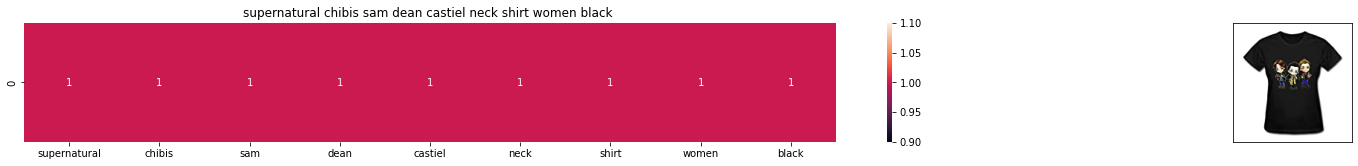

ASIN : B014ICB9A0
Brand: FNC7C
Title: supernatural chibis sam dean castiel neck shirt women black 
Distance with the query image : 0.0


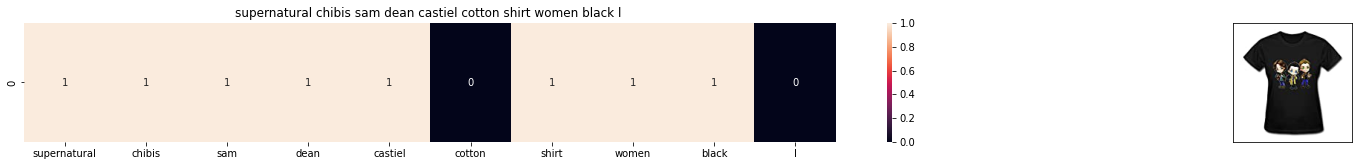

ASIN : B014ICBG9Y
Brand: FNC7C
Title: supernatural chibis sam dean castiel cotton shirt women black l 
Distance with the query image : 0.11111111111111094


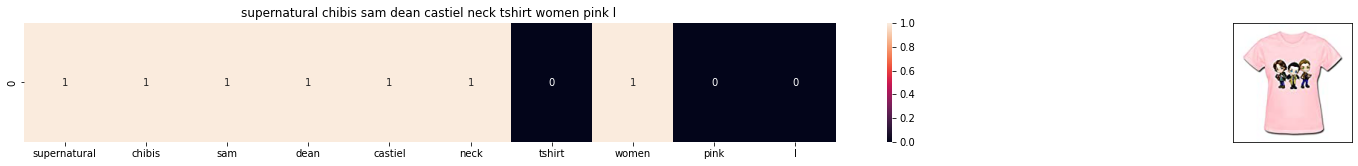

ASIN : B014IC8FZC
Brand: FNC7C
Title: supernatural chibis sam dean castiel neck tshirt women pink l 
Distance with the query image : 0.2222222222222221


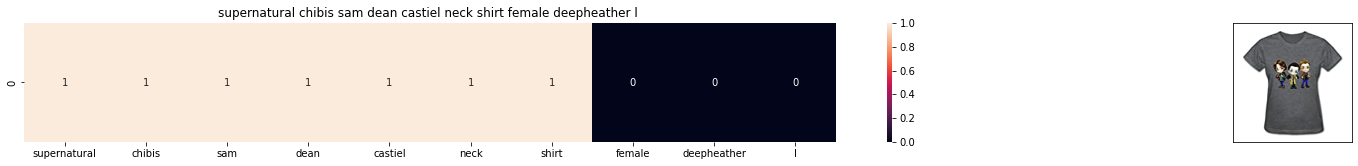

ASIN : B014ICDELM
Brand: FNC7C
Title: supernatural chibis sam dean castiel neck shirt female deepheather l 
Distance with the query image : 0.2222222222222221


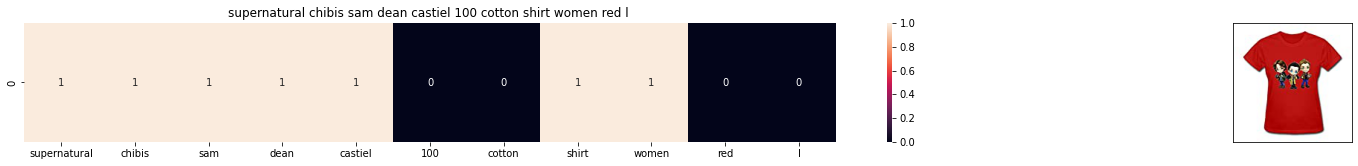

ASIN : B014ICC6AC
Brand: FNC7C
Title: supernatural chibis sam dean castiel 100 cotton shirt women red l 
Distance with the query image : 0.26213521262737816


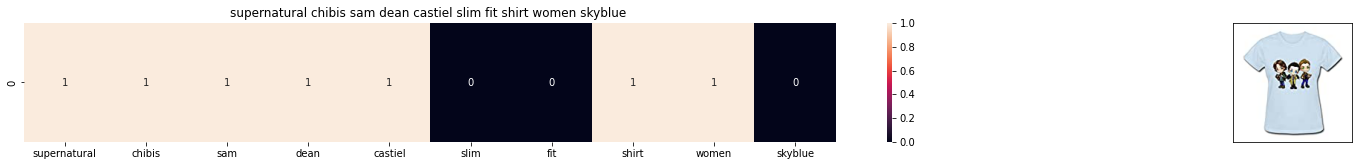

ASIN : B014ICDTYO
Brand: FNC7C
Title: supernatural chibis sam dean castiel slim fit shirt women skyblue 
Distance with the query image : 0.26213521262737816


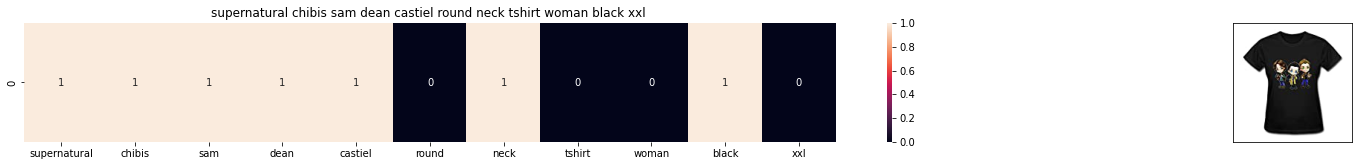

ASIN : B014ICBNQU
Brand: FNC7C
Title: supernatural chibis sam dean castiel round neck tshirt woman black xxl 
Distance with the query image : 0.29647352931855153


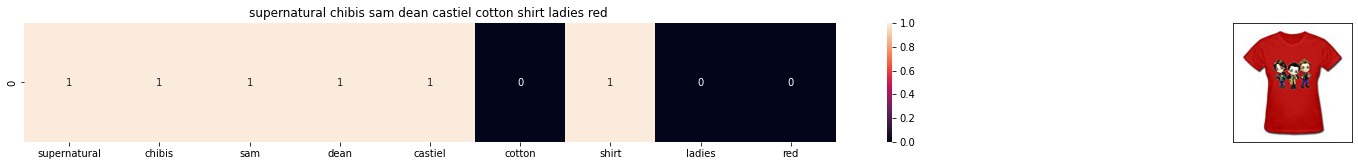

ASIN : B014ICC10C
Brand: FNC7C
Title: supernatural chibis sam dean castiel cotton shirt ladies red 
Distance with the query image : 0.33333333333333326


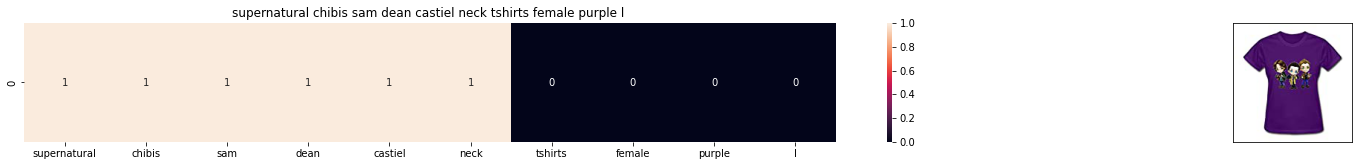

ASIN : B014ICEJ1Q
Brand: FNC7C
Title: supernatural chibis sam dean castiel neck tshirts female purple l 
Distance with the query image : 0.33333333333333326


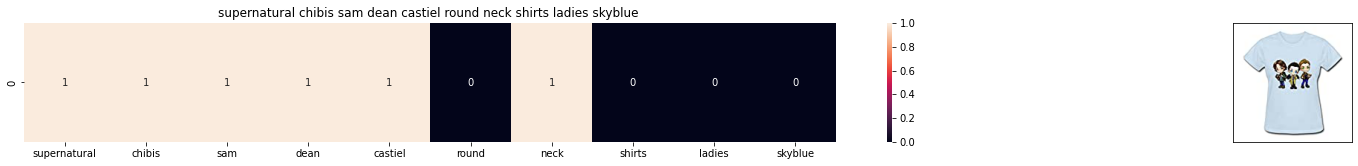

ASIN : B014ICDXOK
Brand: FNC7C
Title: supernatural chibis sam dean castiel round neck shirts ladies skyblue 
Distance with the query image : 0.3675444679663241


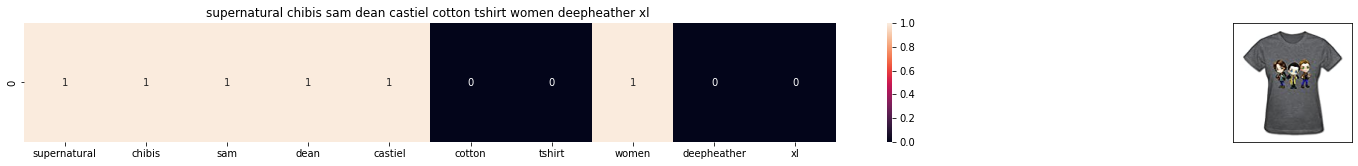

ASIN : B014ICDIGI
Brand: FNC7C
Title: supernatural chibis sam dean castiel cotton tshirt women deepheather xl 
Distance with the query image : 0.3675444679663241


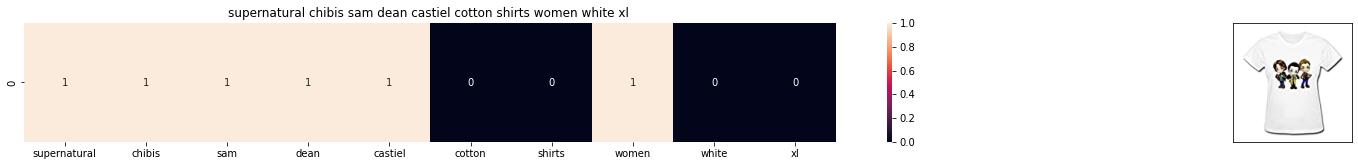

ASIN : B014ICAV4K
Brand: FNC7C
Title: supernatural chibis sam dean castiel cotton shirts women white xl 
Distance with the query image : 0.3675444679663241


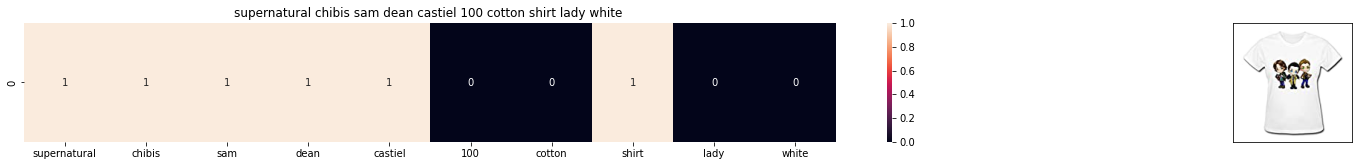

ASIN : B014ICAJT2
Brand: FNC7C
Title: supernatural chibis sam dean castiel 100 cotton shirt lady white 
Distance with the query image : 0.3675444679663241


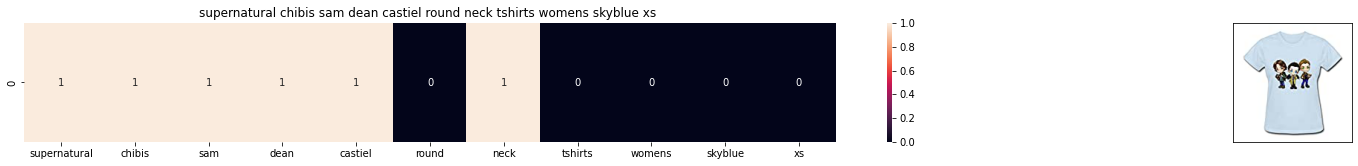

ASIN : B014ICDRHI
Brand: FNC7C
Title: supernatural chibis sam dean castiel round neck tshirts womens skyblue xs 
Distance with the query image : 0.39697731084447274


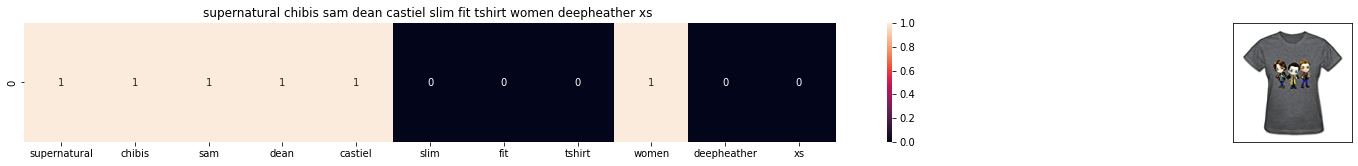

ASIN : B014ICD2D2
Brand: FNC7C
Title: supernatural chibis sam dean castiel slim fit tshirt women deepheather xs 
Distance with the query image : 0.39697731084447274


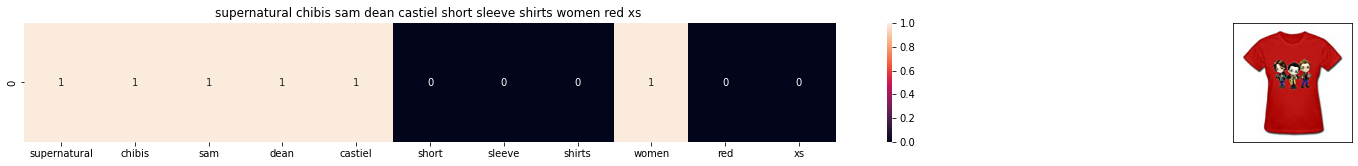

ASIN : B014ICBSE2
Brand: FNC7C
Title: supernatural chibis sam dean castiel short sleeve shirts women red xs 
Distance with the query image : 0.39697731084447274


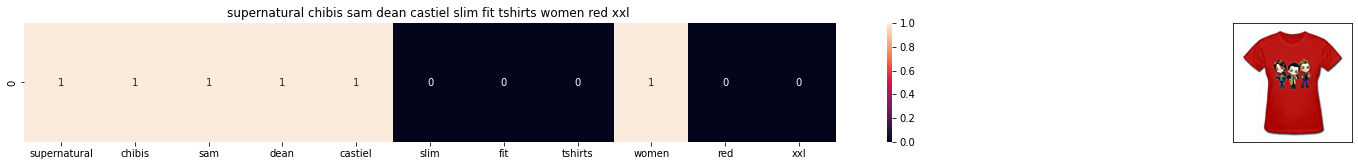

ASIN : B014ICCD3M
Brand: FNC7C
Title: supernatural chibis sam dean castiel slim fit tshirts women red xxl 
Distance with the query image : 0.39697731084447274


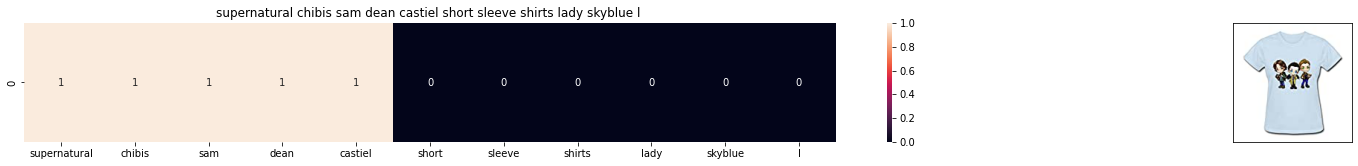

ASIN : B014ICE0VK
Brand: FNC7C
Title: supernatural chibis sam dean castiel short sleeve shirts lady skyblue l 
Distance with the query image : 0.4729537233052701


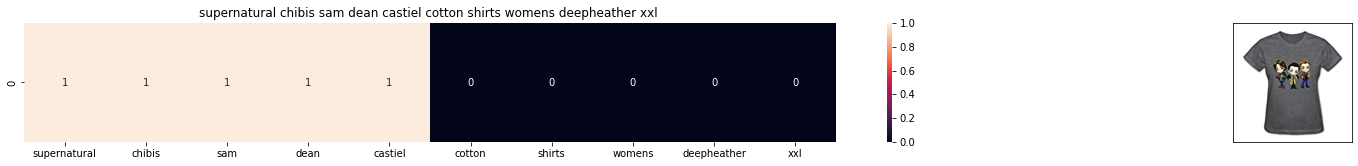

ASIN : B014ICDNZY
Brand: FNC7C
Title: supernatural chibis sam dean castiel cotton shirts womens deepheather xxl 
Distance with the query image : 0.4729537233052701


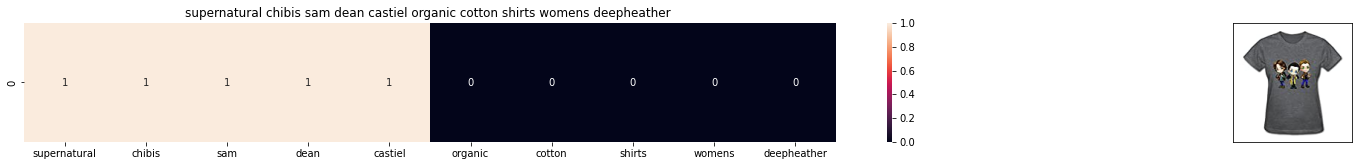

ASIN : B014ICD9YO
Brand: FNC7C
Title: supernatural chibis sam dean castiel organic cotton shirts womens deepheather 
Distance with the query image : 0.4729537233052701


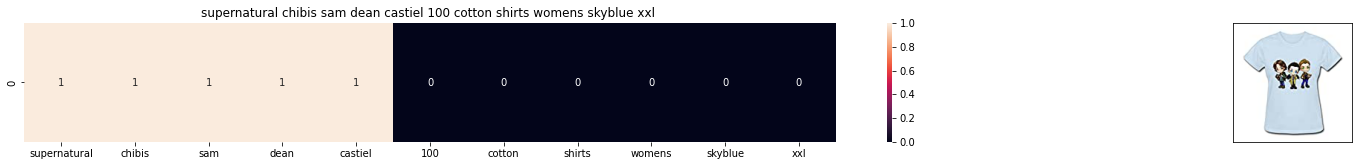

ASIN : B014ICE7IQ
Brand: FNC7C
Title: supernatural chibis sam dean castiel 100 cotton shirts womens skyblue xxl 
Distance with the query image : 0.49748109237039395


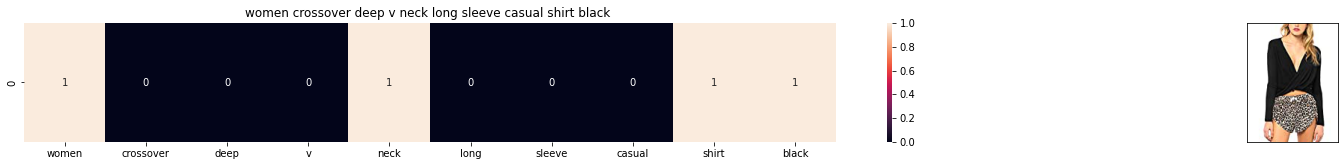

ASIN : B00WW9RVW2
Brand: uxcell
Title: women crossover deep v neck long sleeve casual shirt black 
Distance with the query image : 0.5555555555555556


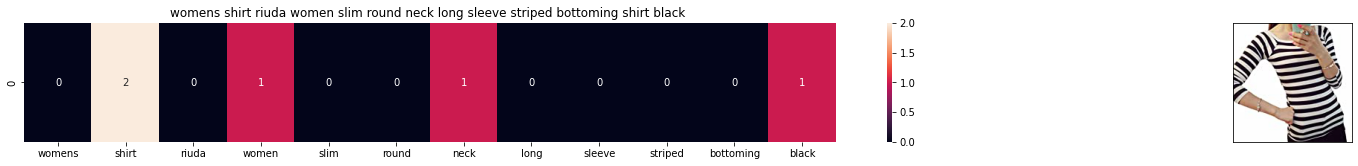

ASIN : B01M1N1VF8
Brand: RIUDA Blouse
Title: womens shirt riuda women slim round neck long sleeve striped bottoming shirt black 
Distance with the query image : 0.5696685170880649


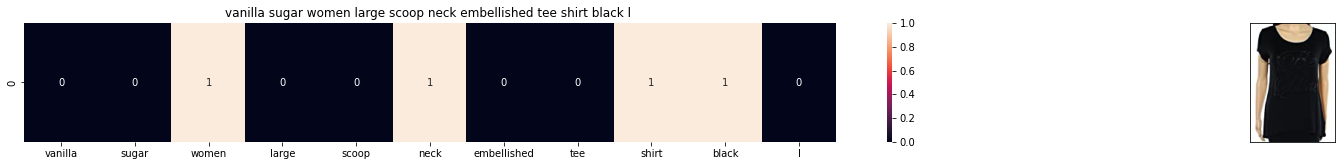

ASIN : B074MJVH4S
Brand: Vanilla Sugar
Title: vanilla sugar women large scoop neck embellished tee shirt black l 
Distance with the query image : 0.5783629786442162


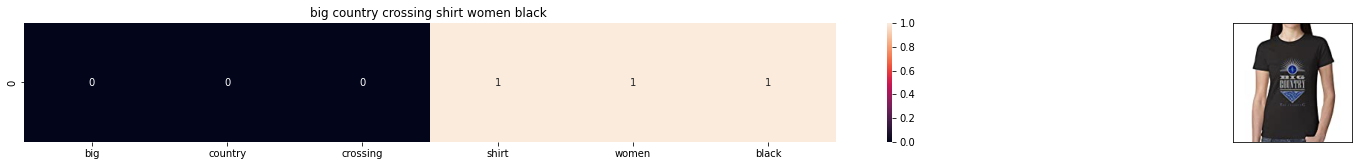

ASIN : B01HEPDCK8
Brand: Tony Arden
Title: big country crossing shirt women black 
Distance with the query image : 0.591751709536137


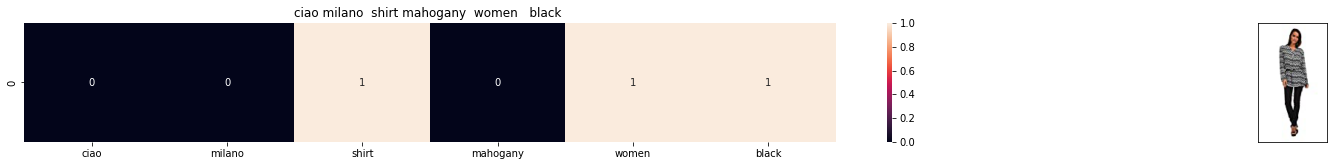

ASIN : B01HMQYORY
Brand: Ciao Milano
Title: ciao milano  shirt mahogany  women   black 
Distance with the query image : 0.591751709536137


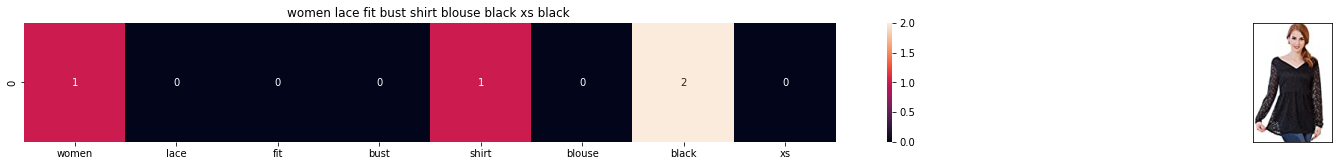

ASIN : B06XWYWG44
Brand: Unomatch
Title: women lace fit bust shirt blouse black xs black 
Distance with the query image : 0.5979848738963152


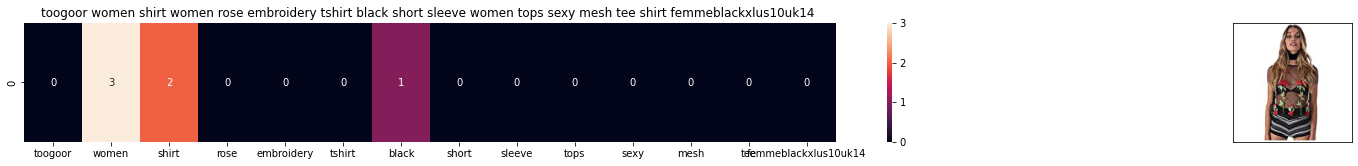

ASIN : B0734KKSMB
Brand: TOOGOO(R)
Title: toogoor women shirt women rose embroidery tshirt black short sleeve women tops sexy mesh tee shirt femmeblackxlus10uk14 
Distance with the query image : 0.6


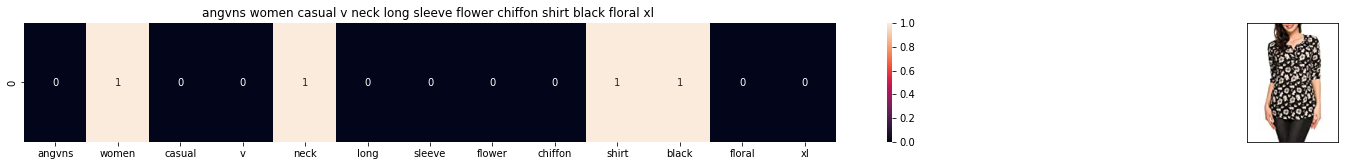

ASIN : B071VLSWN1
Brand: ANGVNS
Title: angvns women casual v neck long sleeve flower chiffon shirt black floral xl 
Distance with the query image : 0.6150998205402495


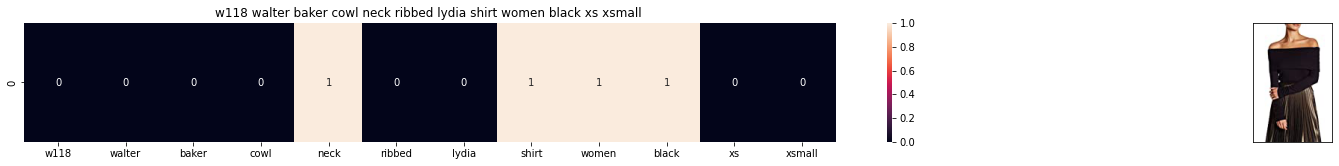

ASIN : B074Q5KGXC
Brand: W118 by Walter Baker
Title: w118 walter baker cowl neck ribbed lydia shirt women black xs xsmall 
Distance with the query image : 0.6150998205402495


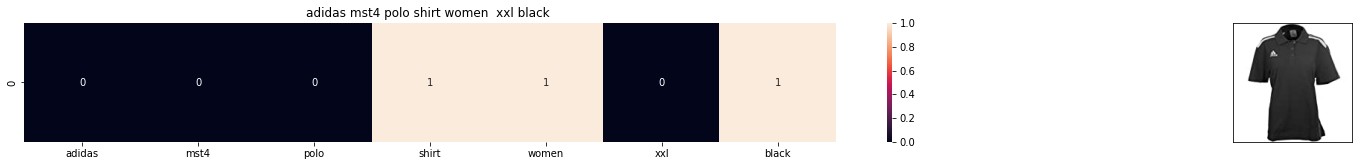

ASIN : B00118UDFW
Brand: None
Title: adidas mst4 polo shirt women  xxl black 
Distance with the query image : 0.6220355269907728


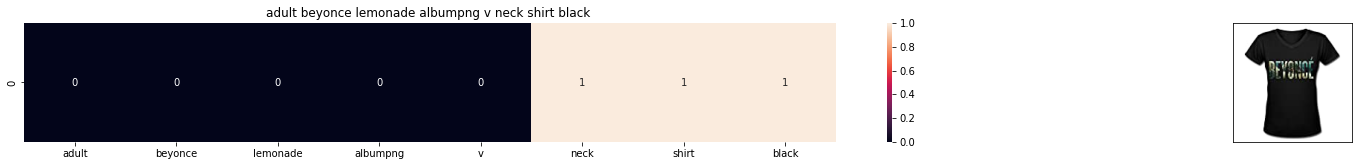

ASIN : B01GNW4L4Y
Brand: GRXBRS
Title: adult beyonce lemonade albumpng v neck shirt black 
Distance with the query image : 0.6220355269907728


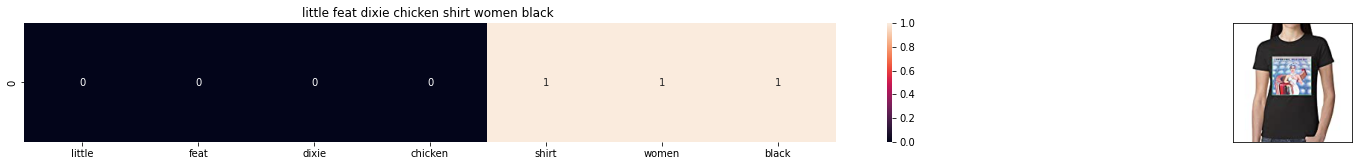

ASIN : B01HAU2IA2
Brand: Tony Arden
Title: little feat dixie chicken shirt women black 
Distance with the query image : 0.6220355269907728


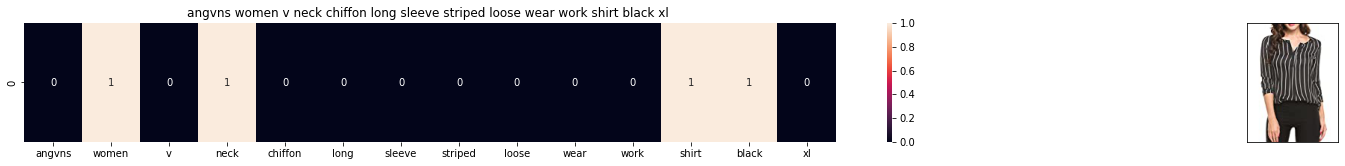

ASIN : B06XHCX2QL
Brand: Angvns
Title: angvns women v neck chiffon long sleeve striped loose wear work shirt black xl 
Distance with the query image : 0.6301998691831806


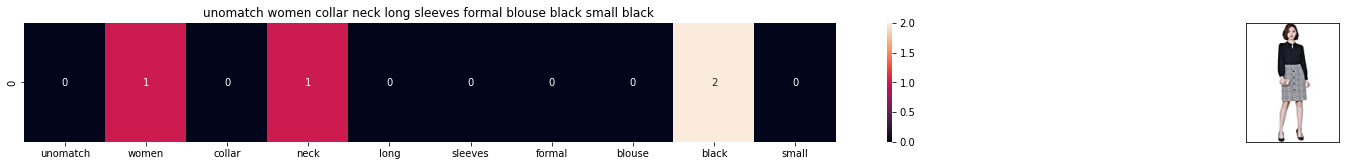

ASIN : B01N9N5VSP
Brand: Unomatch
Title: unomatch women collar neck long sleeves formal blouse black small black 
Distance with the query image : 0.6301998691831806


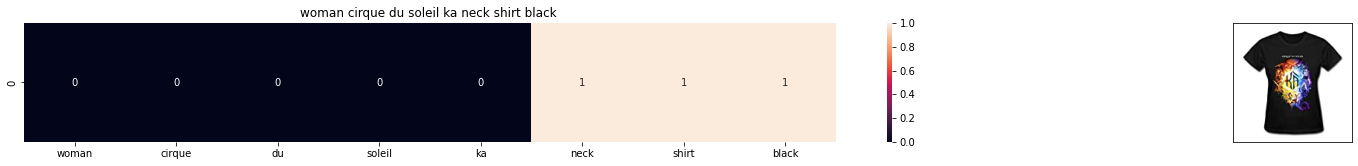

ASIN : B01H2YUH5Y
Brand: VWRXA
Title: woman cirque du soleil ka neck shirt black 
Distance with the query image : 0.6464466094067263


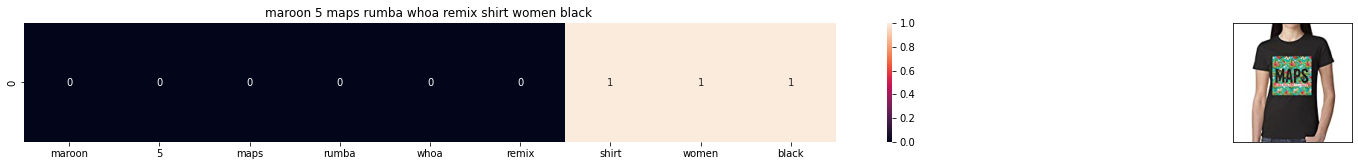

ASIN : B01HAU17U4
Brand: Tony Arden
Title: maroon 5 maps rumba whoa remix shirt women black 
Distance with the query image : 0.6464466094067263


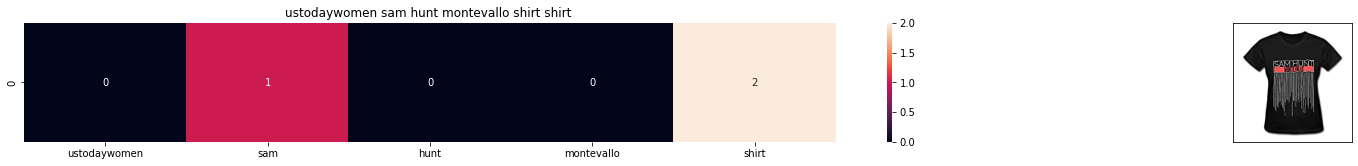

ASIN : B01LTHDVCQ
Brand: USASTATE-421
Title: ustodaywomen sam hunt montevallo shirt shirt 
Distance with the query image : 0.6464466094067263


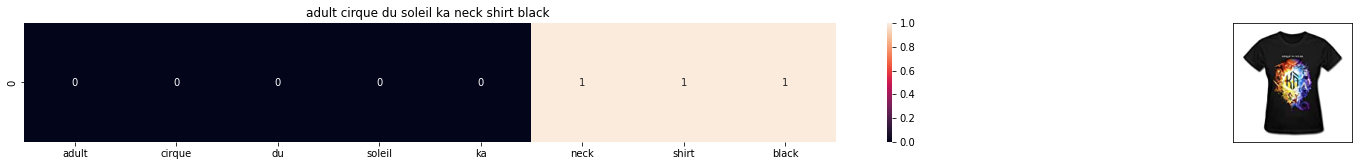

ASIN : B01H2YUJDY
Brand: VWRXA
Title: adult cirque du soleil ka neck shirt black 
Distance with the query image : 0.6464466094067263


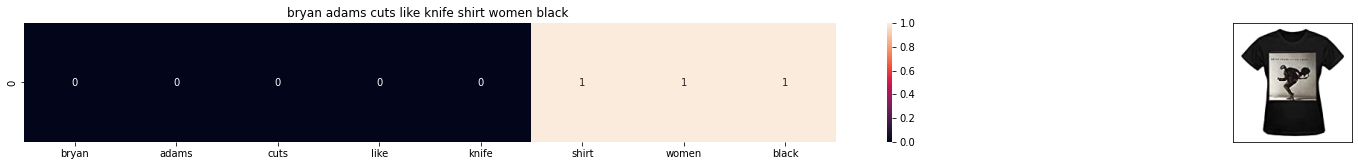

ASIN : B01HBEAWI2
Brand: Tony Arden
Title: bryan adams cuts like knife shirt women black 
Distance with the query image : 0.6464466094067263


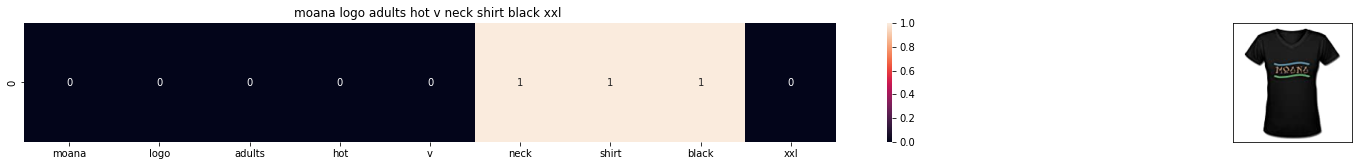

ASIN : B01LX6H43D
Brand: BOBOB
Title: moana logo adults hot v neck shirt black xxl 
Distance with the query image : 0.6464466094067263


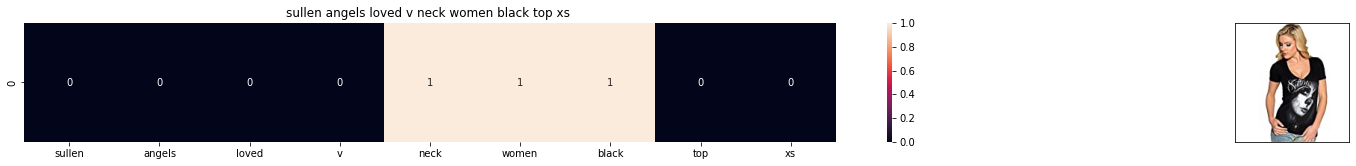

ASIN : B01C4LF1NI
Brand: Sullen Art Collective
Title: sullen angels loved v neck women black top xs 
Distance with the query image : 0.6464466094067263


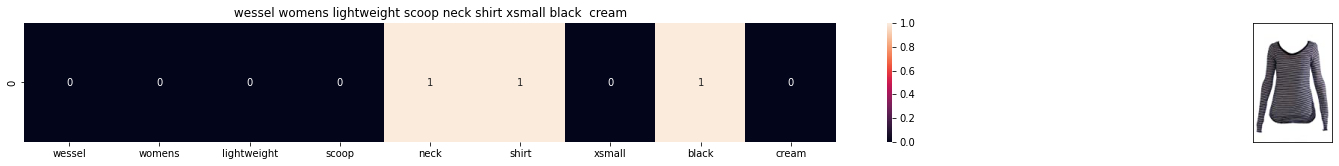

ASIN : B0184RI20U
Brand: With & Wessel
Title:  wessel womens lightweight scoop neck shirt xsmall black  cream 
Distance with the query image : 0.6666666666666667


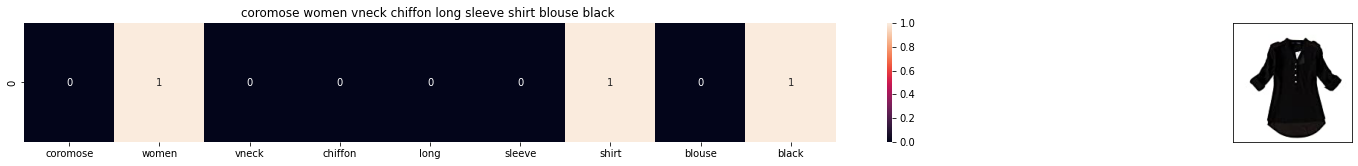

ASIN : B00NNFP22K
Brand: coromose
Title: coromose women vneck chiffon long sleeve shirt blouse black 
Distance with the query image : 0.6666666666666667


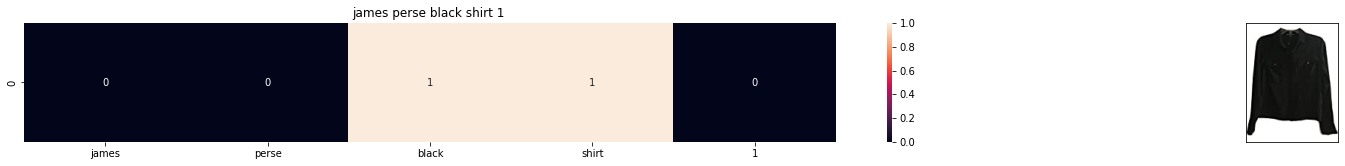

ASIN : B01N8Z2K60
Brand: James Perse
Title: james perse black shirt 1 
Distance with the query image : 0.6666666666666667


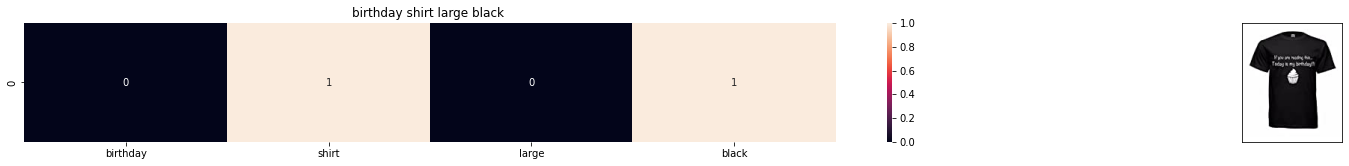

ASIN : B06XQ5V17Z
Brand: Speak Your Piece
Title: birthday shirt large black 
Distance with the query image : 0.6666666666666667


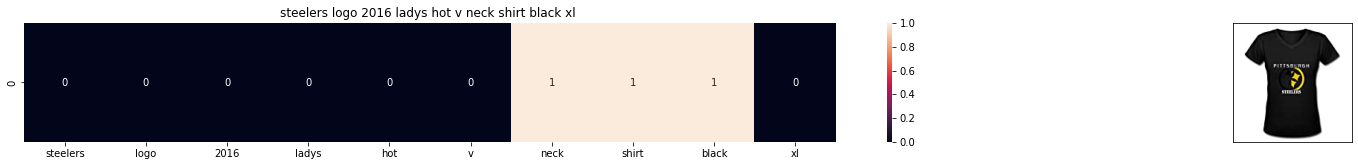

ASIN : B01LX6H2P7
Brand: BOBOB
Title: steelers logo 2016 ladys hot v neck shirt black xl 
Distance with the query image : 0.6666666666666667


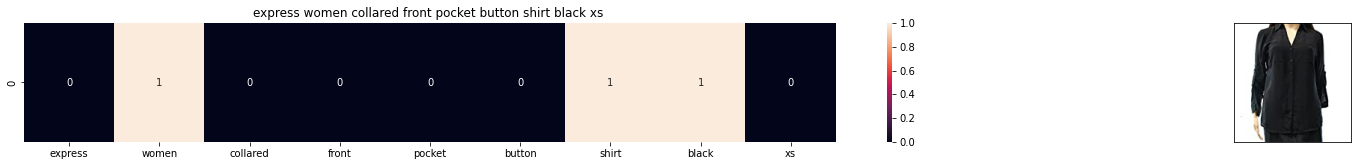

ASIN : B074WDXT15
Brand: Express
Title: express women collared front pocket button shirt black xs 
Distance with the query image : 0.6666666666666667


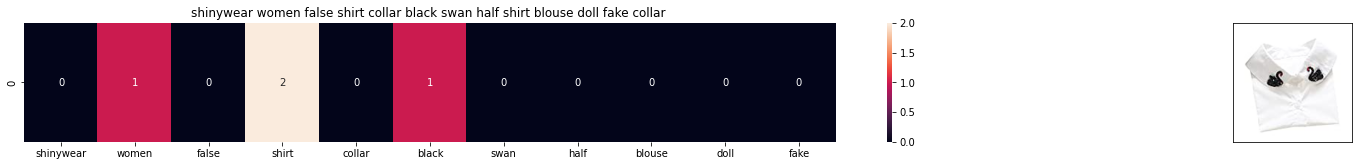

ASIN : B01LZWF3HJ
Brand: Shinywear
Title: shinywear women false shirt collar black swan half shirt blouse doll fake collar 
Distance with the query image : 0.6766191666182227


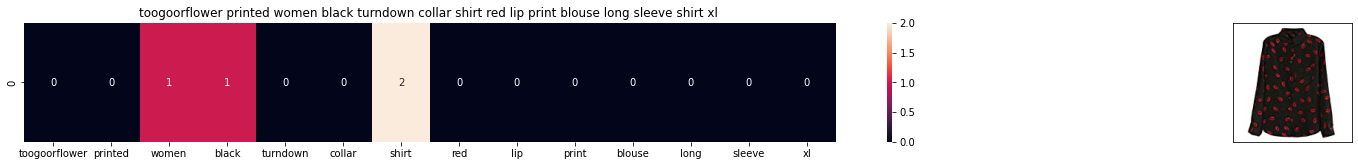

ASIN : B013U18SU4
Brand: TOOGOO(R)
Title: toogoorflower printed women black turndown collar shirt red lip print blouse long sleeve shirt xl 
Distance with the query image : 0.6766191666182227


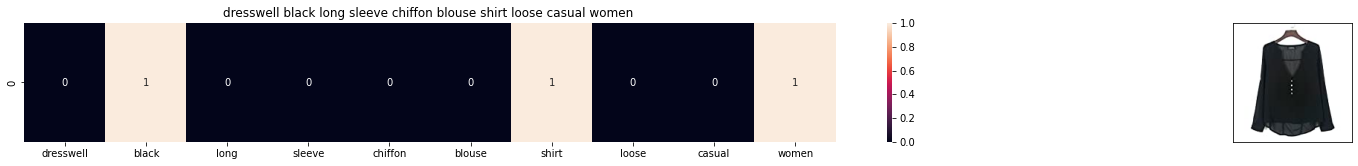

ASIN : B01JS2A3BG
Brand: Dresswell
Title: dresswell black long sleeve chiffon blouse shirt loose casual women 
Distance with the query image : 0.683772233983162


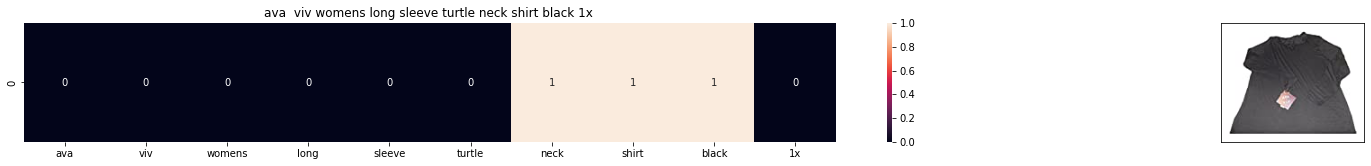

ASIN : B072JPX7V3
Brand: Ava & Viv
Title: ava  viv womens long sleeve turtle neck shirt black 1x 
Distance with the query image : 0.683772233983162


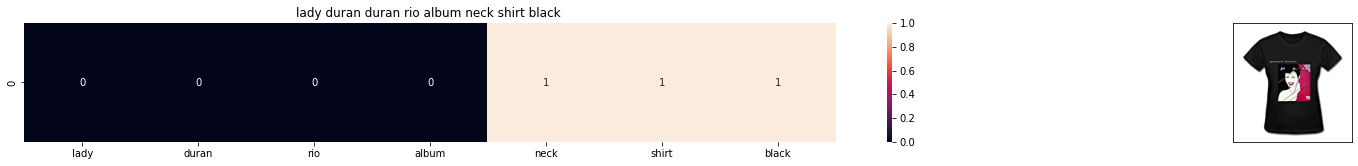

ASIN : B01HPHWJCC
Brand: VWRXA
Title: lady duran duran rio album neck shirt black 
Distance with the query image : 0.683772233983162


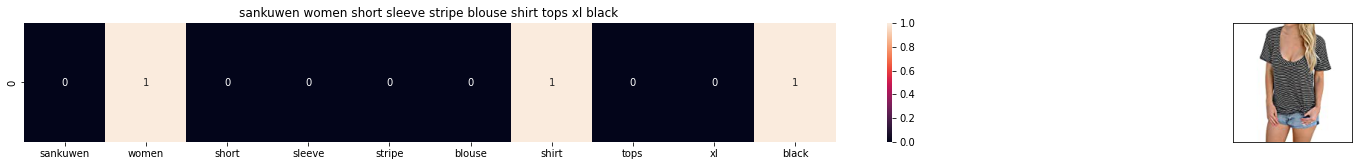

ASIN : B06X43V8BT
Brand: Sankuwen
Title: sankuwen women short sleeve stripe blouse shirt tops xl black 
Distance with the query image : 0.683772233983162


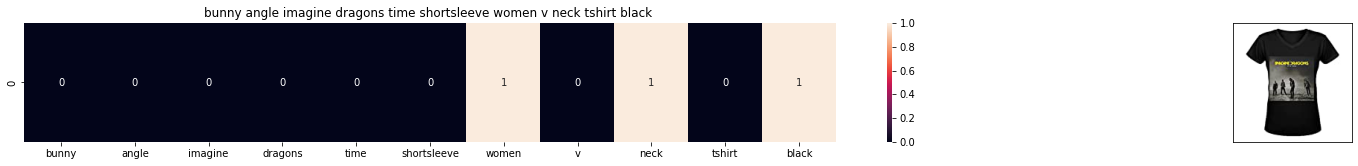

ASIN : B01G3JGSIY
Brand: Bunny Angle
Title: bunny angle imagine dragons time shortsleeve women v neck tshirt black 
Distance with the query image : 0.683772233983162


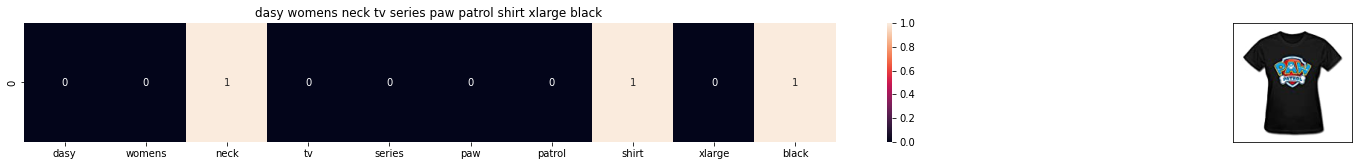

ASIN : B015J2XE56
Brand: Dasy
Title: dasy womens neck tv series paw patrol shirt xlarge black 
Distance with the query image : 0.683772233983162


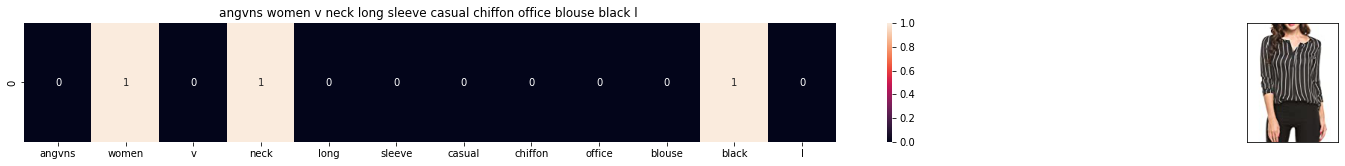

ASIN : B06XHGK1Q9
Brand: Angvns
Title: angvns women v neck long sleeve casual chiffon office blouse black l 
Distance with the query image : 0.683772233983162


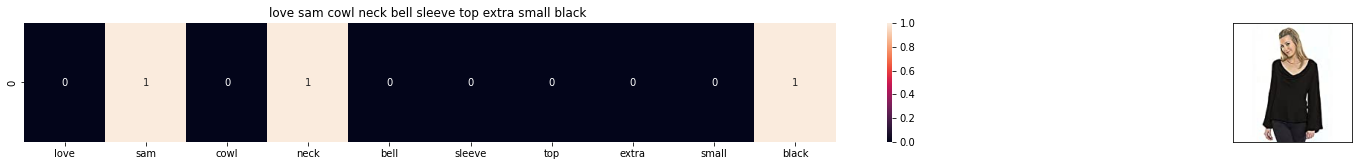

ASIN : B00WRSRHR2
Brand: Love Sam
Title: love sam cowl neck bell sleeve top extra small black 
Distance with the query image : 0.683772233983162


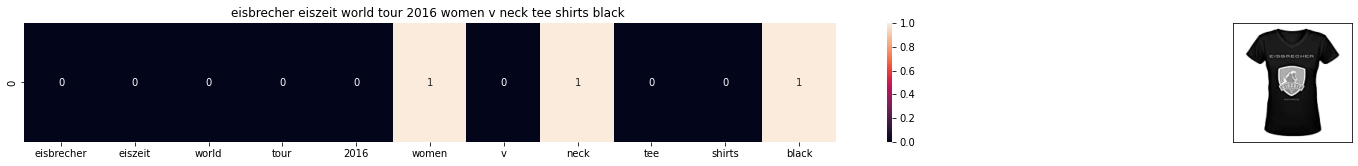

ASIN : B01IT9KJ04
Brand: Bunny Angle
Title: eisbrecher eiszeit world tour 2016 women v neck tee shirts black 
Distance with the query image : 0.683772233983162


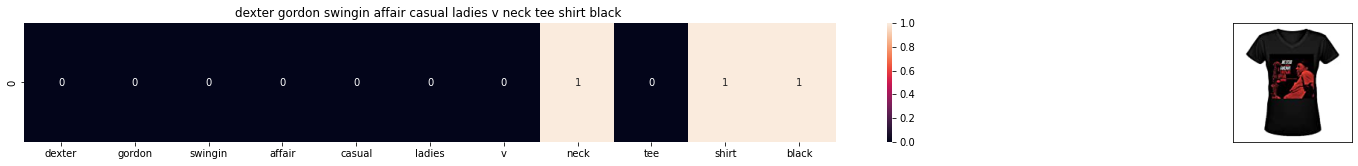

ASIN : B01HCYSJ54
Brand: Bunny Angle
Title: dexter gordon swingin affair casual ladies v neck tee shirt black 
Distance with the query image : 0.683772233983162


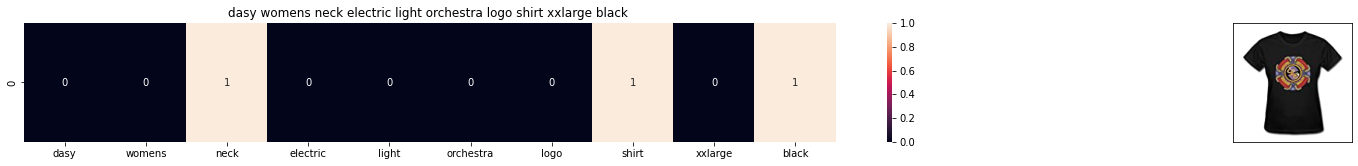

ASIN : B016EXUZC4
Brand: Dasy
Title: dasy womens neck electric light orchestra logo shirt xxlarge black 
Distance with the query image : 0.683772233983162


In [61]:
def bag_of_words_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    pairwise_dist = pairwise_distances(bow_title_features, bow_title_features[doc_id], metric='cosine', n_jobs=-1)
    
    # np.argsort will return indices of the smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])
    
    for i in range(0,len(indices)):
        # we will pass 1. doc_id, 2. title1, 3. title2, url, model
        get_result(indices[i],data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'bag_of_words')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print ('Brand:', data['brand'].loc[df_indices[i]])
        print ('Title:', data['title'].loc[df_indices[i]])
        print ('Distance with the query image :', pdists[i])
        print('='*60)

#call the bag-of-words model for a product to get similar products.
bag_of_words_model(7, 61) # change the index if you want to.
# In the output heat map each value represents the count value 
# of the label word, the color represents the intersection 
# with inputs title.



# TF-IDF product similarity

In [50]:
tfidf_title_vectorizer = TfidfVectorizer(min_df = 0)
tfidf_title_features = tfidf_title_vectorizer.fit_transform(data['title'])
# tfidf_title_features.shape = #data_points * #words_in_corpus
# CountVectorizer().fit_transform(courpus) returns the a sparase matrix of dimensions #data_points * #words_in_corpus
# tfidf_title_features[doc_id, index_of_word_in_corpus] = tfidf values of the word in given doc

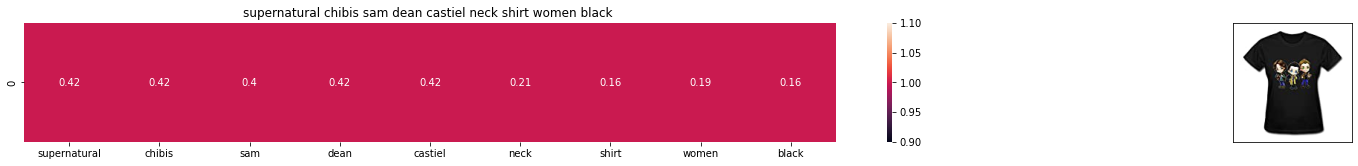

ASIN : B014ICB9A0
BRAND : FNC7C
Distance from the given image : 0.0


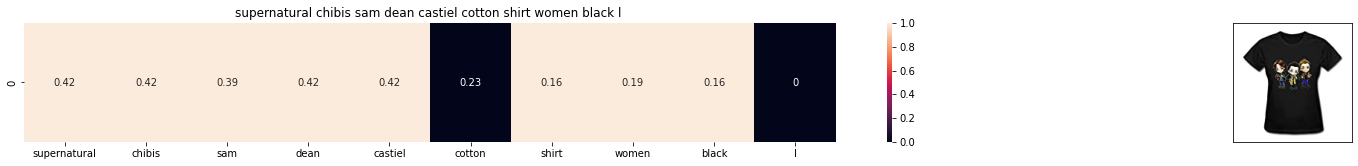

ASIN : B014ICBG9Y
BRAND : FNC7C
Distance from the given image : 0.04759364639724861


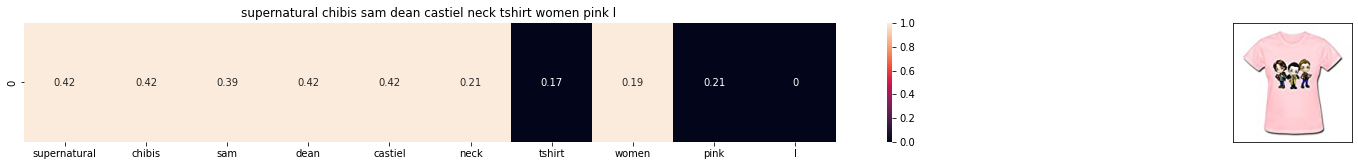

ASIN : B014IC8FZC
BRAND : FNC7C
Distance from the given image : 0.061738365371170834


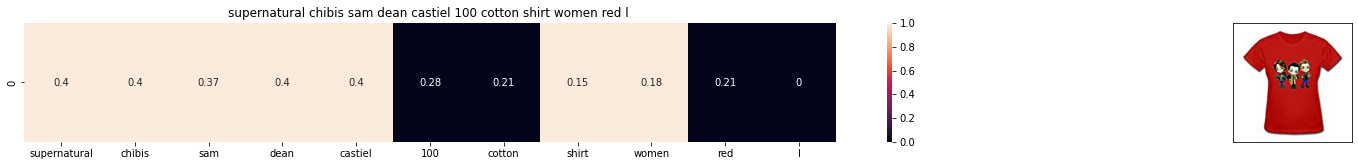

ASIN : B014ICC6AC
BRAND : FNC7C
Distance from the given image : 0.11904257938513563


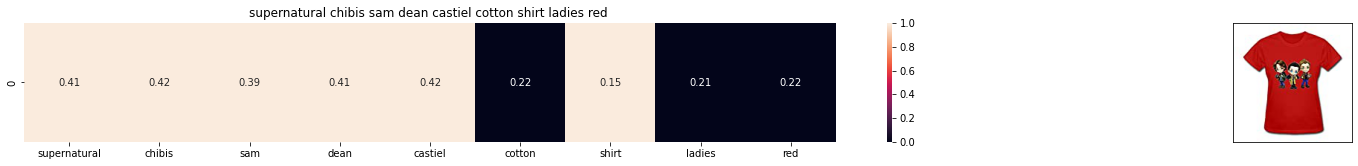

ASIN : B014ICC10C
BRAND : FNC7C
Distance from the given image : 0.12325813316756373


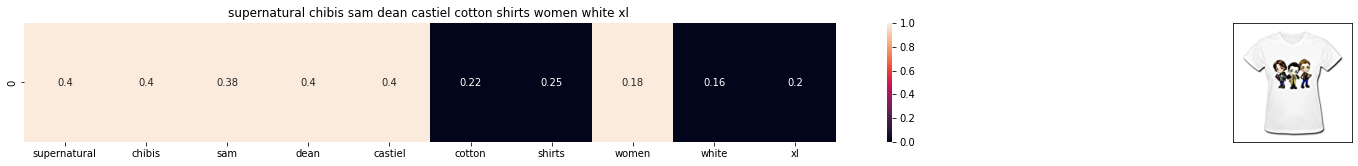

ASIN : B014ICAV4K
BRAND : FNC7C
Distance from the given image : 0.13472668940227006


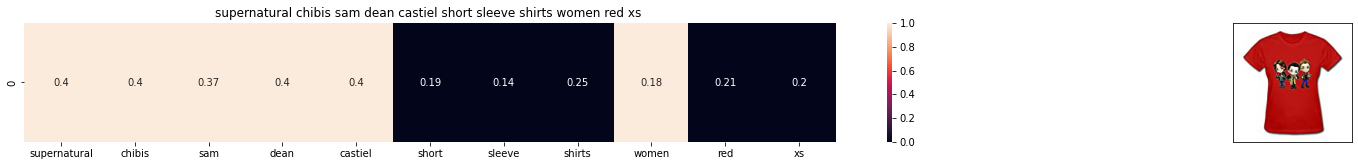

ASIN : B014ICBSE2
BRAND : FNC7C
Distance from the given image : 0.14857635251919377


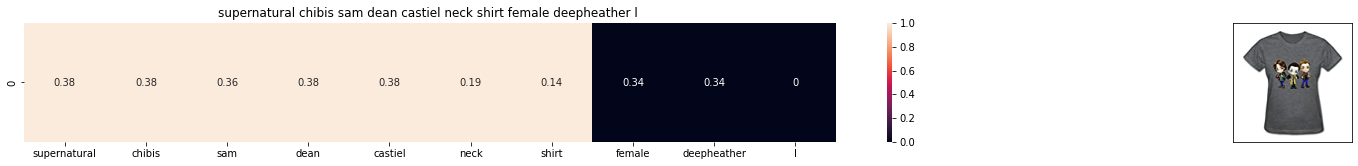

ASIN : B014ICDELM
BRAND : FNC7C
Distance from the given image : 0.14999894768000055


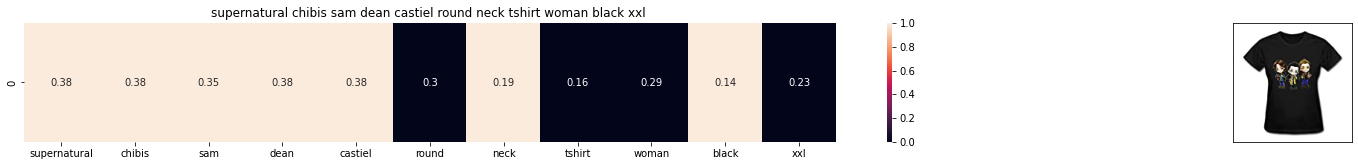

ASIN : B014ICBNQU
BRAND : FNC7C
Distance from the given image : 0.15883225346939234


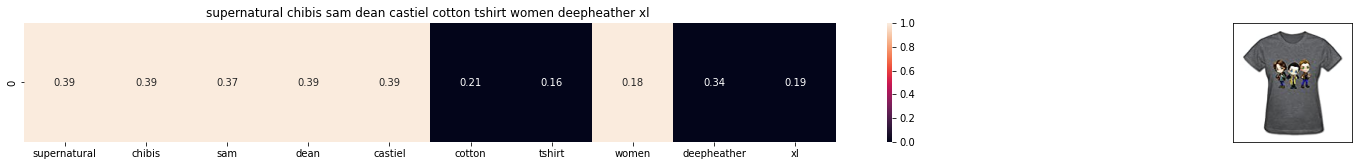

ASIN : B014ICDIGI
BRAND : FNC7C
Distance from the given image : 0.16126628577341162


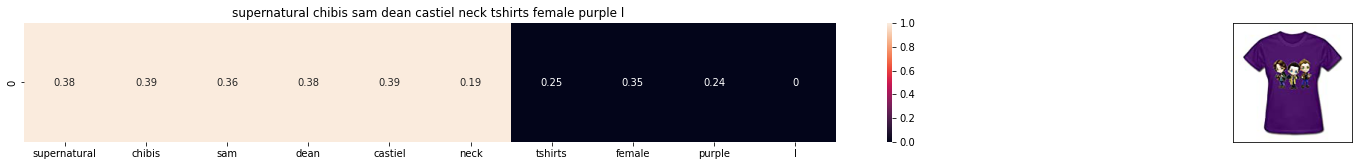

ASIN : B014ICEJ1Q
BRAND : FNC7C
Distance from the given image : 0.16658703513817386


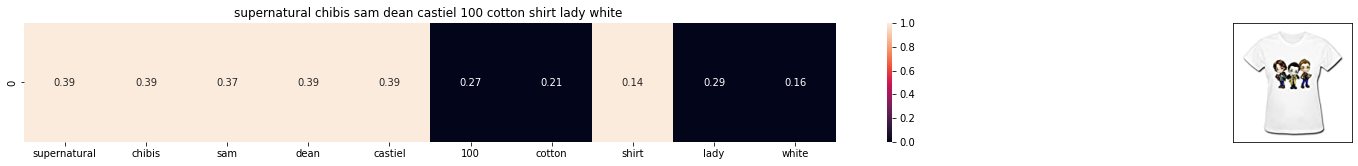

ASIN : B014ICAJT2
BRAND : FNC7C
Distance from the given image : 0.16787573000090128


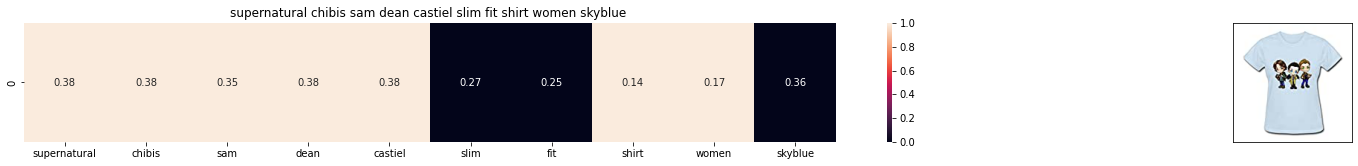

ASIN : B014ICDTYO
BRAND : FNC7C
Distance from the given image : 0.1694452463764209


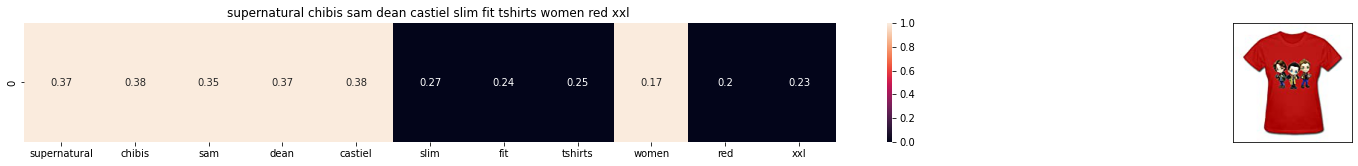

ASIN : B014ICCD3M
BRAND : FNC7C
Distance from the given image : 0.1943865265194087


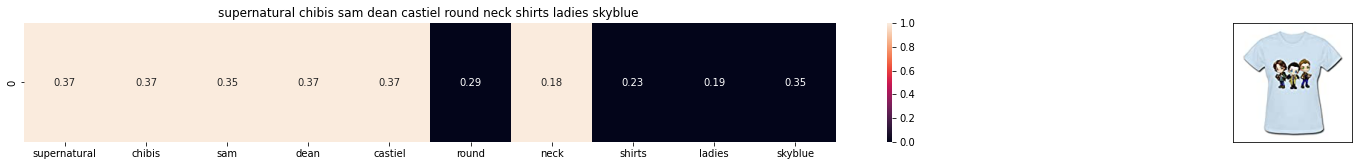

ASIN : B014ICDXOK
BRAND : FNC7C
Distance from the given image : 0.1972301327165109


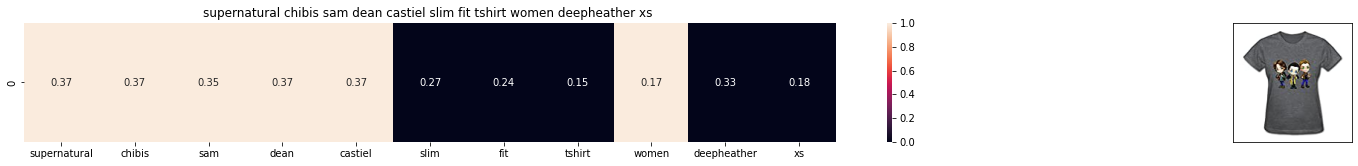

ASIN : B014ICD2D2
BRAND : FNC7C
Distance from the given image : 0.20029318988269562


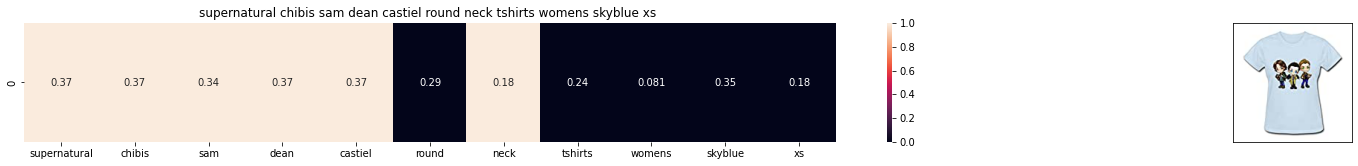

ASIN : B014ICDRHI
BRAND : FNC7C
Distance from the given image : 0.20153375724573297


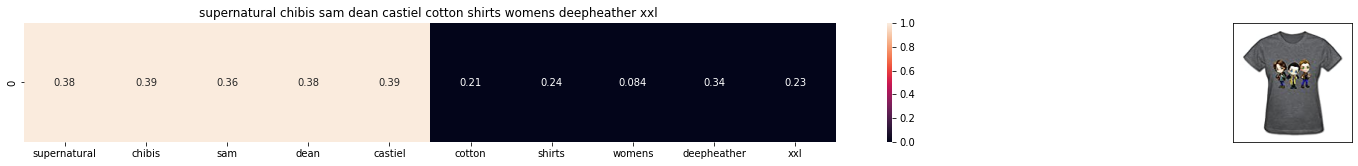

ASIN : B014ICDNZY
BRAND : FNC7C
Distance from the given image : 0.20616491803350712


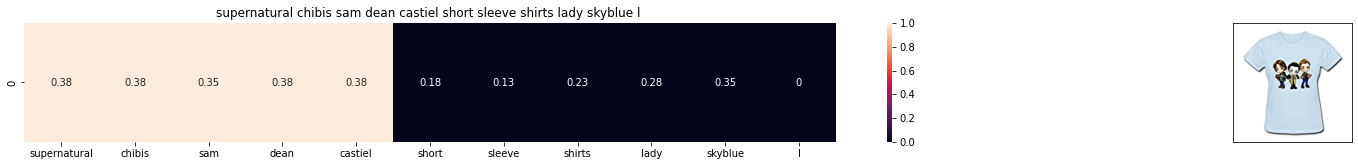

ASIN : B014ICE0VK
BRAND : FNC7C
Distance from the given image : 0.22455037863363037


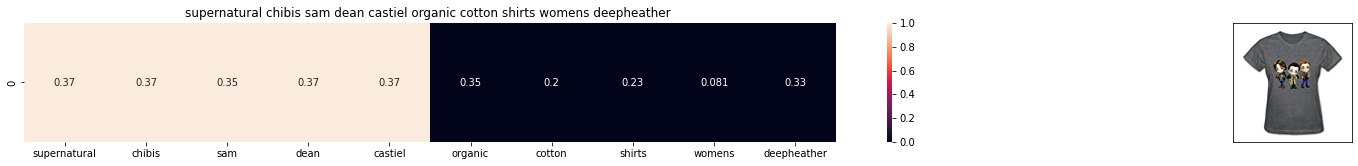

ASIN : B014ICD9YO
BRAND : FNC7C
Distance from the given image : 0.2348380095881497


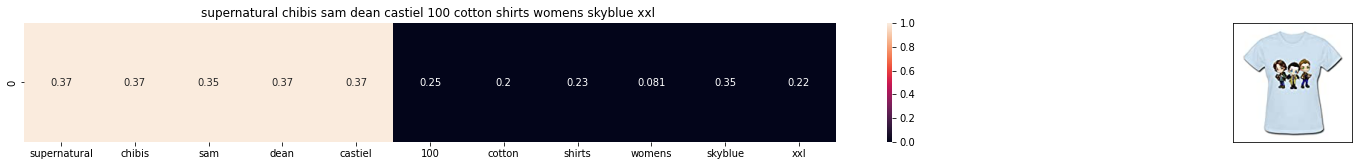

ASIN : B014ICE7IQ
BRAND : FNC7C
Distance from the given image : 0.23882305064825127


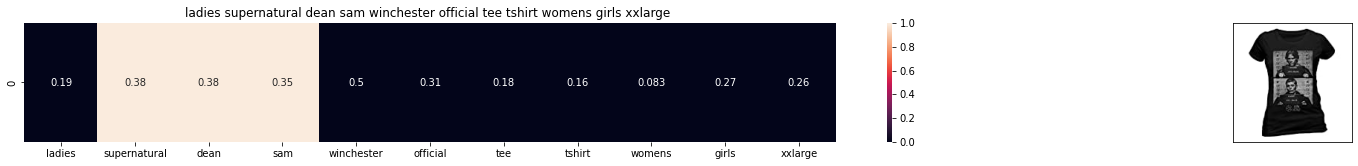

ASIN : B06XPJ7C88
BRAND : Tee Shack
Distance from the given image : 0.5421537117838108


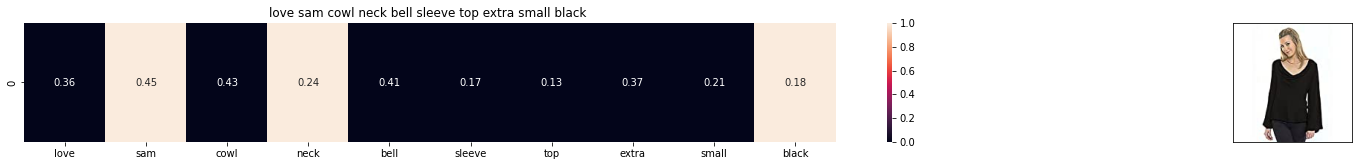

ASIN : B00WRSRHR2
BRAND : Love Sam
Distance from the given image : 0.7431711326892225


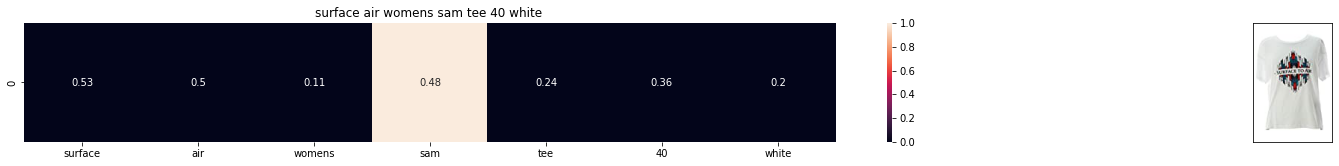

ASIN : B0187ZBG2K
BRAND : Surface to Air
Distance from the given image : 0.8114408092049942


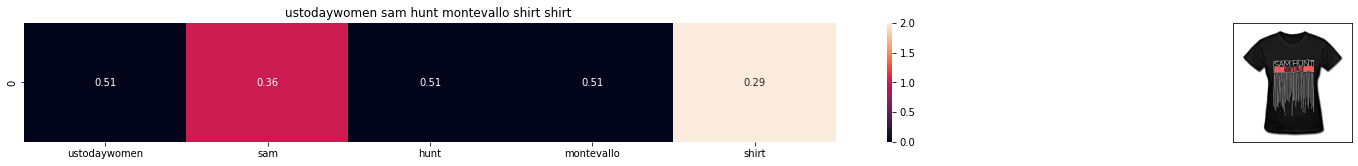

ASIN : B01LTHDVCQ
BRAND : USASTATE-421
Distance from the given image : 0.8116321033459412


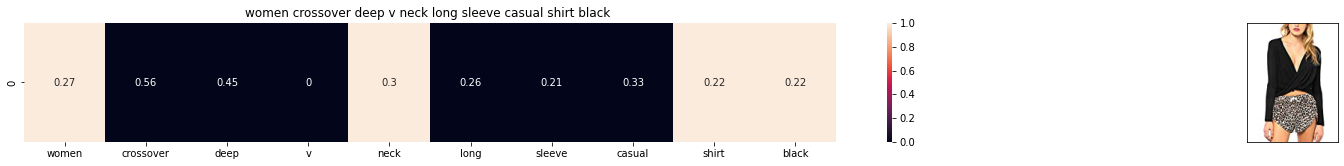

ASIN : B00WW9RVW2
BRAND : uxcell
Distance from the given image : 0.8167739641690801


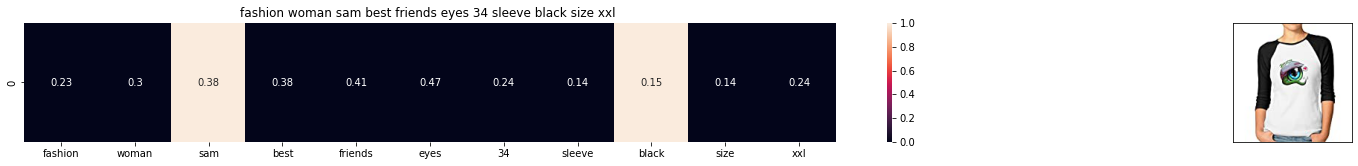

ASIN : B01FRPKGRY
BRAND : LOVELIF Sleeve Raglan
Distance from the given image : 0.8279390501193616


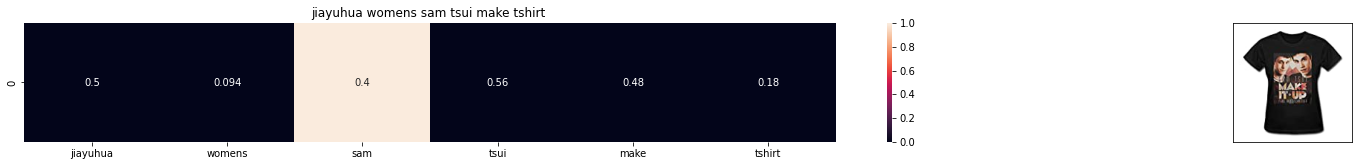

ASIN : B014QLDCGW
BRAND : JIAYUHUA
Distance from the given image : 0.8417407155461005


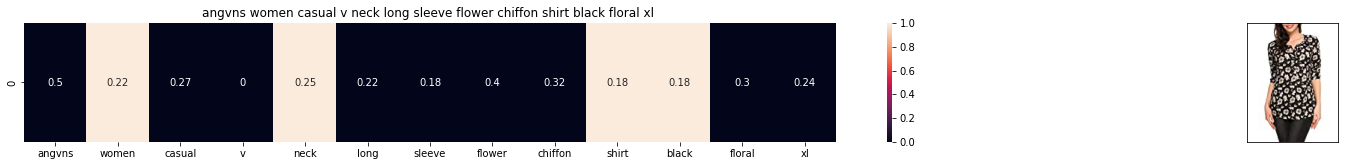

ASIN : B071VLSWN1
BRAND : ANGVNS
Distance from the given image : 0.8475896265839074


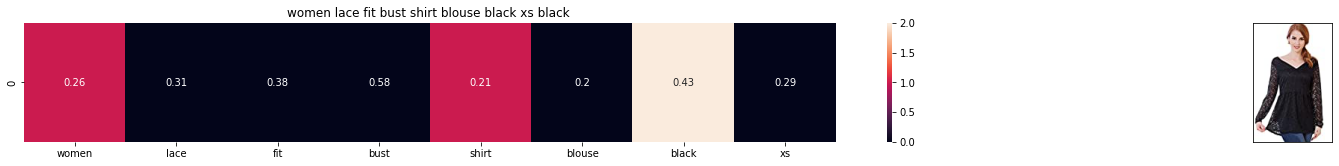

ASIN : B06XWYWG44
BRAND : Unomatch
Distance from the given image : 0.8492910612434145


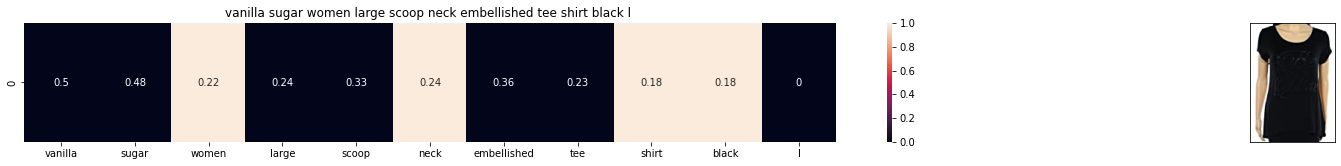

ASIN : B074MJVH4S
BRAND : Vanilla Sugar
Distance from the given image : 0.850443273194998


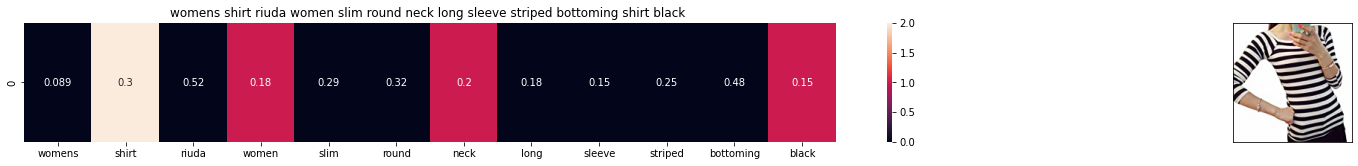

ASIN : B01M1N1VF8
BRAND : RIUDA Blouse
Distance from the given image : 0.8516556099515907


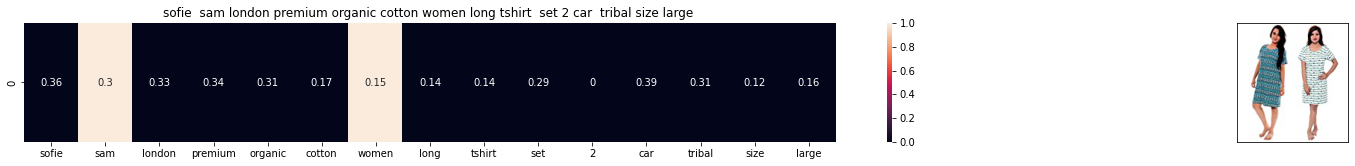

ASIN : B06X6C7QCY
BRAND : Sofie & Sam
Distance from the given image : 0.8517677322749083


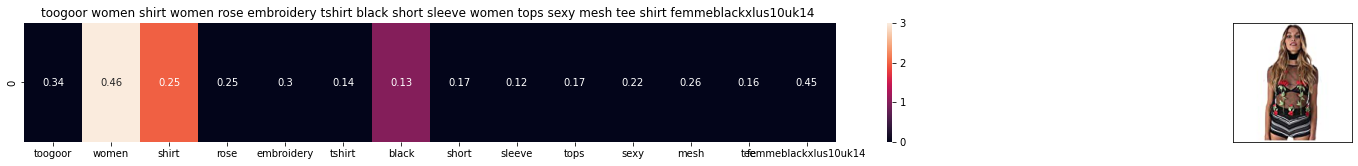

ASIN : B0734KKSMB
BRAND : TOOGOO(R)
Distance from the given image : 0.8525500449308583


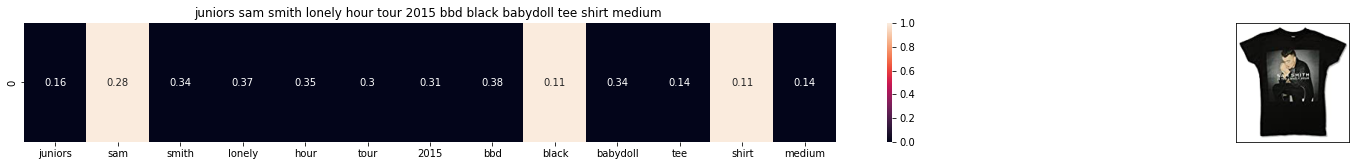

ASIN : B00Y12MMYA
BRAND : Bay Island Sportswear
Distance from the given image : 0.8526584577724693


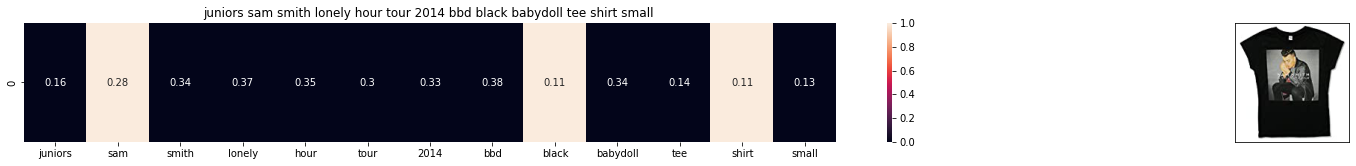

ASIN : B00Y125DYQ
BRAND : Bay Island Sportswear
Distance from the given image : 0.8535032849328983


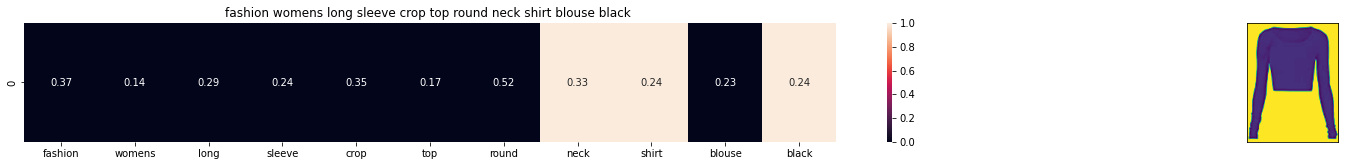

ASIN : B00M2URM34
BRAND : Canis
Distance from the given image : 0.8549063803761485


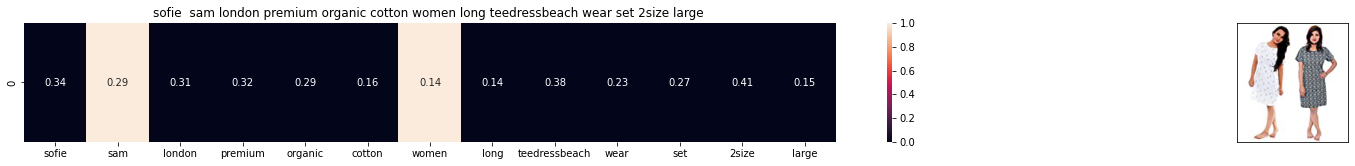

ASIN : B06W2FZ4RC
BRAND : Sofie & Sam
Distance from the given image : 0.8600336086024264


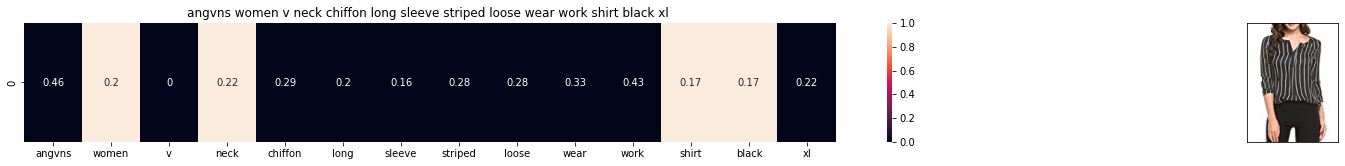

ASIN : B06XHCX2QL
BRAND : Angvns
Distance from the given image : 0.8622076153515258


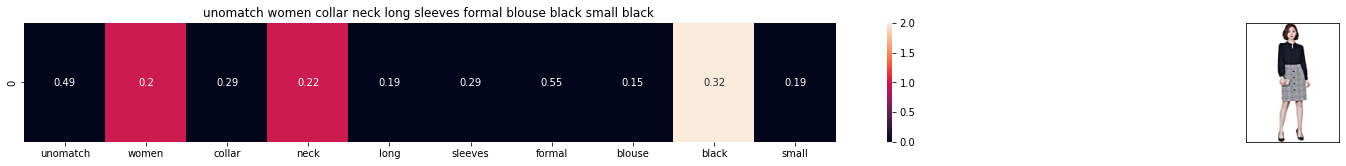

ASIN : B01N9N5VSP
BRAND : Unomatch
Distance from the given image : 0.8660503378042509


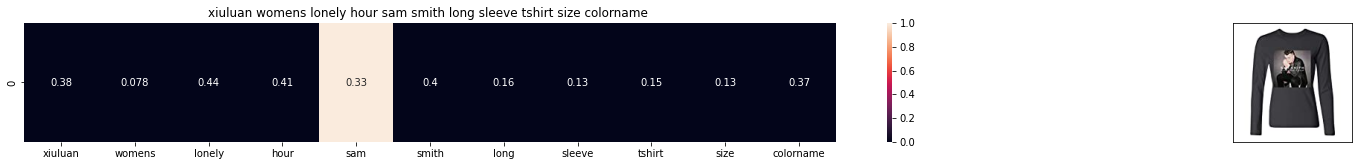

ASIN : B01GNJOLRE
BRAND : XIULUAN
Distance from the given image : 0.8680885691403266


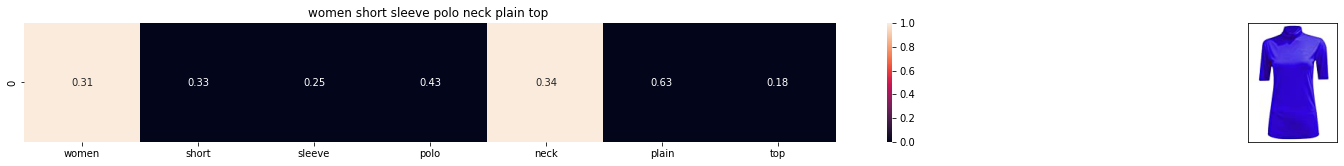

ASIN : B01M4GF99L
BRAND : ApplesBottom
Distance from the given image : 0.869311015969733


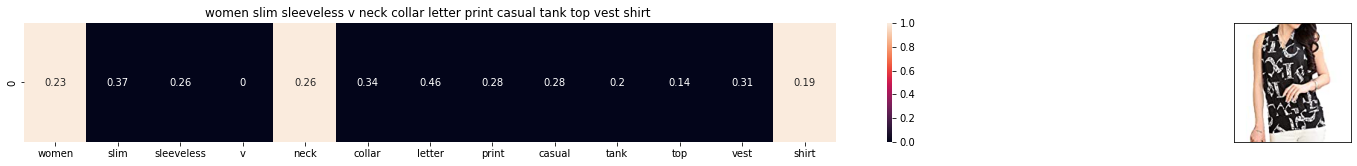

ASIN : B01D2TXWLO
BRAND : Blansdi
Distance from the given image : 0.8708287972290533


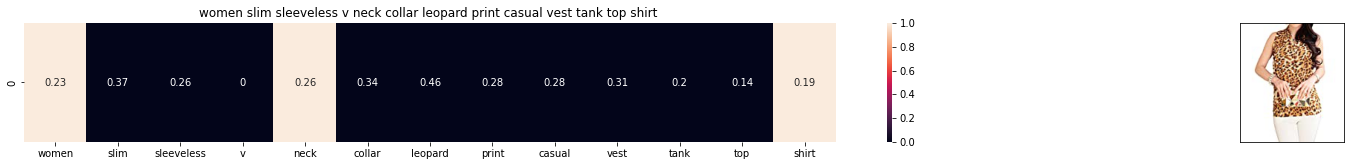

ASIN : B01D2SNUXU
BRAND : Blansdi
Distance from the given image : 0.8708975260536441


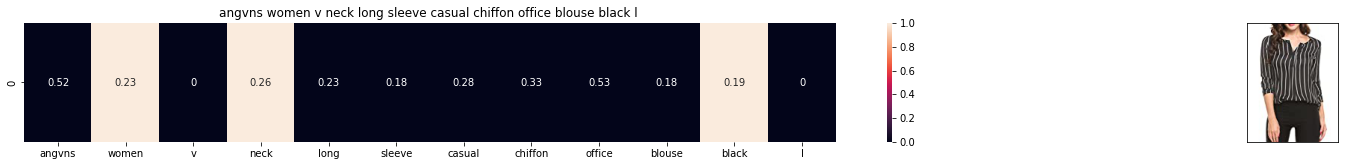

ASIN : B06XHGK1Q9
BRAND : Angvns
Distance from the given image : 0.8725901441388386


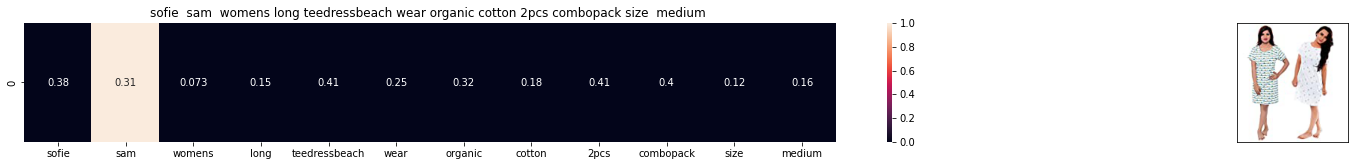

ASIN : B06VSDLP96
BRAND : Sofie & Sam
Distance from the given image : 0.8758615380381582


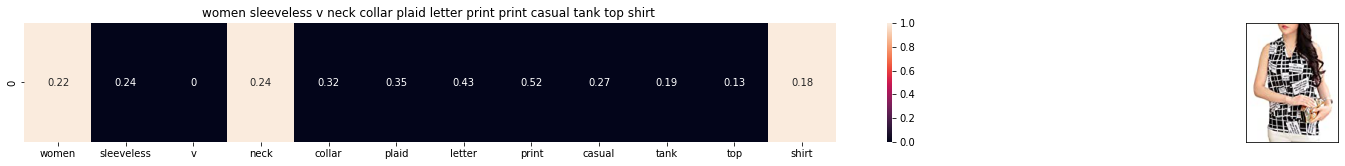

ASIN : B01D2TY1ZU
BRAND : Blansdi
Distance from the given image : 0.8786682150913997


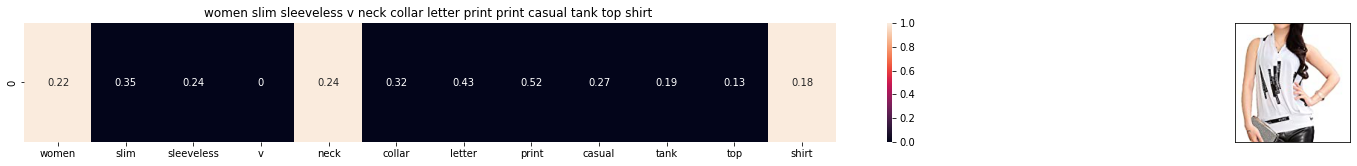

ASIN : B01D2TY2ZE
BRAND : Blansdi
Distance from the given image : 0.8787089264941479


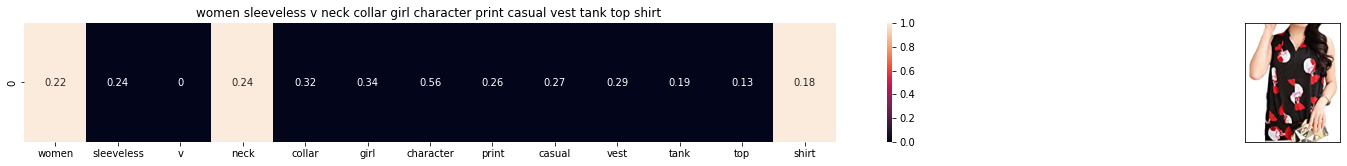

ASIN : B01D2TY09M
BRAND : Blansdi
Distance from the given image : 0.8789401004848904


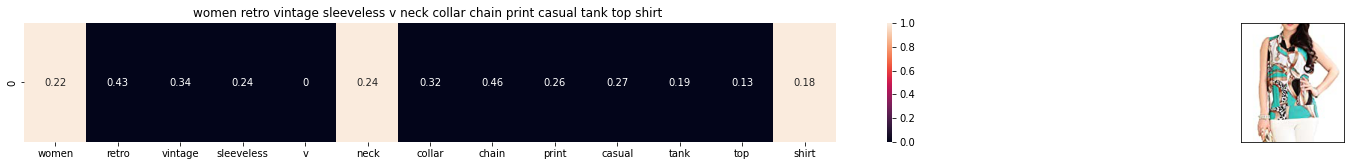

ASIN : B01D2TISLI
BRAND : Blansdi
Distance from the given image : 0.8792660895822949


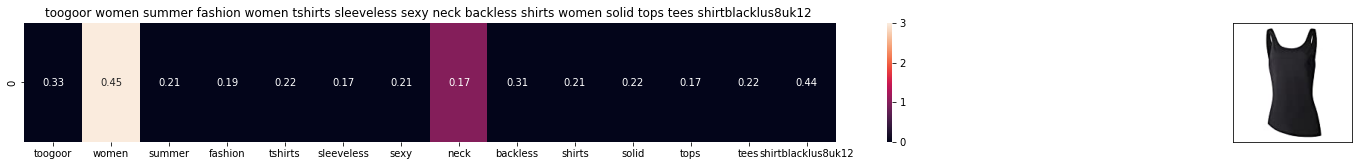

ASIN : B0734K3G2X
BRAND : TOOGOO(R)
Distance from the given image : 0.8793353534566991


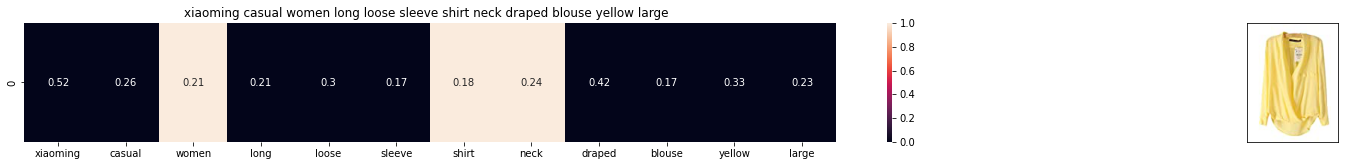

ASIN : B00WPJHEE4
BRAND : xiaoming
Distance from the given image : 0.881807671256586


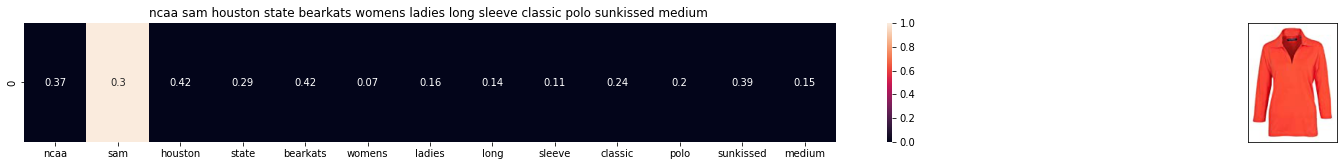

ASIN : B008HZU2OO
BRAND : Oxford
Distance from the given image : 0.8819099517767595


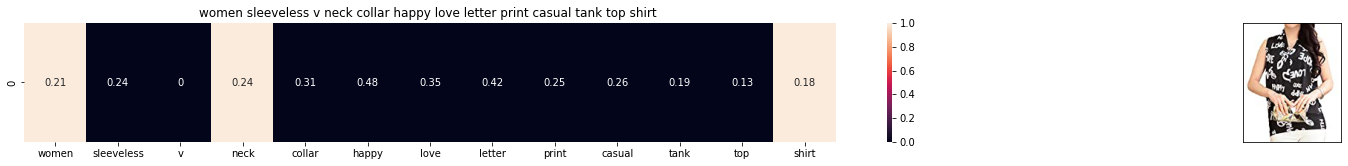

ASIN : B01D2TXXDG
BRAND : Blansdi
Distance from the given image : 0.8819184405962162


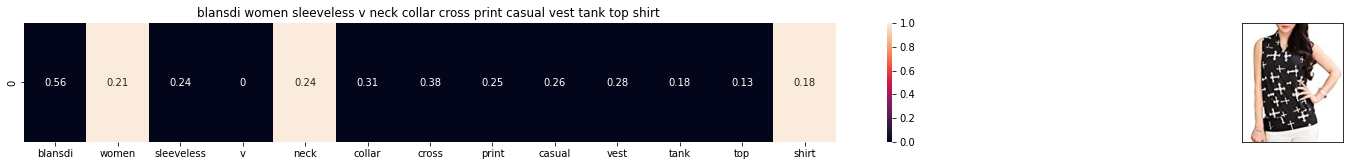

ASIN : B01D2TXZDO
BRAND : Blansdi
Distance from the given image : 0.8821036893693512


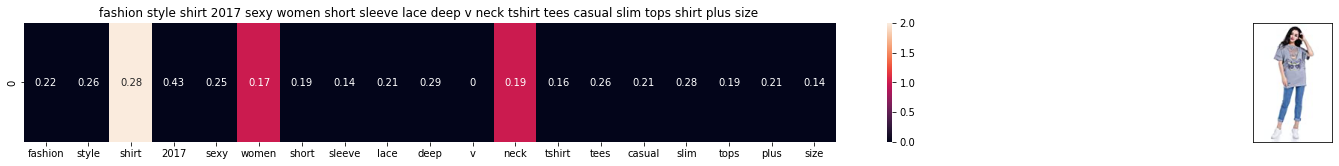

ASIN : B01MS2NG40
BRAND : LHS Charmer
Distance from the given image : 0.8825694401560965


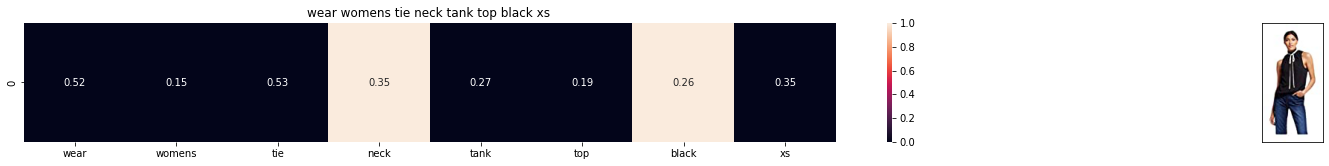

ASIN : B071RYB16J
BRAND : Who What Wear
Distance from the given image : 0.8846200175894492


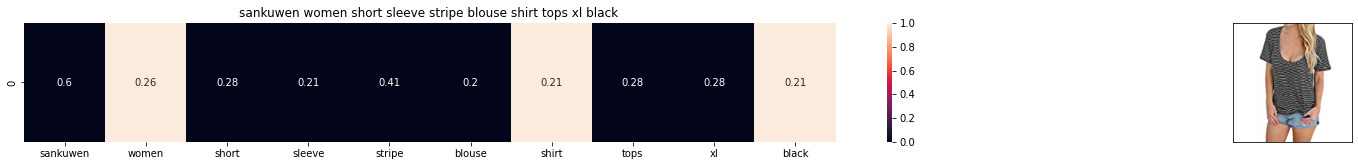

ASIN : B06X43V8BT
BRAND : Sankuwen
Distance from the given image : 0.8846847931126574


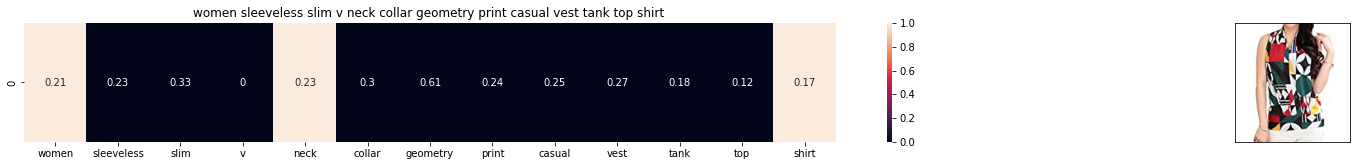

ASIN : B01D2TY16E
BRAND : Blansdi
Distance from the given image : 0.8850976414697695


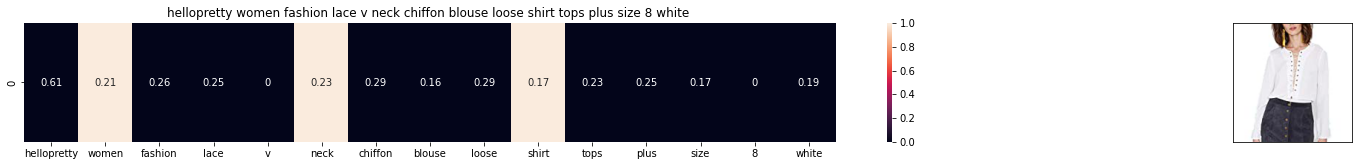

ASIN : B016CW52N4
BRAND : HelloPretty
Distance from the given image : 0.8852058972035984


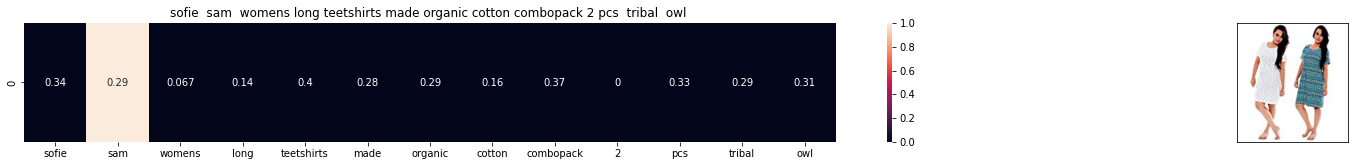

ASIN : B06W2G2RD4
BRAND : Sofie & Sam
Distance from the given image : 0.8865805768273396


In [62]:
def tfidf_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    pairwise_dist = pairwise_distances(tfidf_title_features,tfidf_title_features[doc_id],metric='cosine', n_jobs=-1)

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])

    for i in range(0,len(indices)):
        # we will pass 1. doc_id, 2. title1, 3. title2, url, model
        get_result(indices[i], data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'tfidf')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('BRAND :',data['brand'].loc[df_indices[i]])
        print ('Distance from the given image :', pdists[i])
        print('='*125)
tfidf_model(7, 61)
# in the output heat map each value represents the tfidf values of the label word, the color represents the intersection with inputs title